# Post Melodic Analysis
> Ignore cells 1 and 2 it's just some helpful libraries and functions that I'm pre-defining

In [1]:
from IPython.core.display import HTML
from scipy.stats import zscore
from scipy.stats import zscore
from statsmodels.formula.api import ols,mixedlm,gls
from statsmodels.stats.anova import anova_lm
import statsmodels
import natsort

def multi_table(table_list):
    return HTML(
    '<table><tr style="background-color:white;">'+
    ''.join(['<td>'+table._repr_html_()+'</td>' for table in table_list])+
    '</tr></table>'
    )
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

from patsy.contrasts import ContrastMatrix

def _name_levels(prefix, levels):
    return ["[%s%s]" % (prefix, level) for level in levels]

class Simple(object):
    def _simple_contrast(self, levels):
        nlevels = len(levels)
        contr = -1./nlevels * np.ones((nlevels, nlevels-1))
        contr[1:][np.diag_indices(nlevels-1)] = (nlevels-1.)/nlevels
        return contr

    def code_with_intercept(self, levels):
        contrast = np.column_stack((np.ones(len(levels)),
                                    self._simple_contrast(levels)))
        return ContrastMatrix(contrast, _name_levels("Simp.", levels))

    def code_without_intercept(self, levels):
        contrast = self._simple_contrast(levels)
        return ContrastMatrix(contrast, _name_levels("Simp.", levels[:-1]))

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# Experiment 1: (Human Connectome Data)
> [x] Organize TICA Output
>- [x] Hand Classify Components
>- [x] Make files for PALM
>- [x] Find Components that Track task
>- [ ] Find Components that Track Individual Differences


In [3]:
# Organize TICA OUTPUT
# Which Experiment Are we Analyzing
import os
import re
import pandas as pd
EXP="Exp1" #Choose "Exp1" HCP Data "Exp2" Rutgers Data  or "Exp3" NARPS Data
sub_data=pd.read_csv('Post-Melodic/Exp1/all_DesignMatrix.csv',index_col=0)
sub_data['Subject'] = 'sub-' + sub_data['Subject'].astype('int').astype('str')
sub_data['groups']=sub_data[['Dep','FamHist','HC']].idxmax(axis=1)

tica_output=[os.path.join(root,d) for root,dirs,files in os.walk("Post-Melodic/"+EXP)
             for d in dirs if ((d.endswith(".ica"))&("20dim" in d))]
sub_data.head()

Subject  Dep  FamHist   HC  Sex_demeaned  rel_mean_soc  Dep_Sx_demeaned  \
0  sub-100206  0.0      1.0  0.0     -0.569892      0.054334        -2.426523   
1  sub-100307  0.0      1.0  0.0      0.430108      0.061692        -0.426523   
2  sub-101107  0.0      1.0  0.0     -0.569892      0.081705        -0.426523   
3  sub-101915  0.0      0.0  1.0      0.430108      0.080708        -2.426523   
4  sub-102311  0.0      0.0  1.0      0.430108      0.070459        -2.426523   

   Sadness_demeaned  200_demeaned  40K_demeaned  Drinks_demeaned  \
0          7.214695     -0.181722     -0.487545        -2.344086   
1          5.614695     -0.116618     -0.226087         4.655914   
2          0.314695     -0.190316      0.046830         1.655914   
3         -5.085305      0.257861      0.385892         2.655914   
4          3.214695     -0.213363     -0.321920        -1.344086   

   Tobacco_demeaned   groups  
0         -5.688172  FamHist  
1         -5.688172  FamHist  
2         -2.688172  FamHist  
3         -5.688172       HC  
4         -5.688172       HC

### EXP1: (Human Connectome Data)
> Hand Classify Components

 40 out of 40 components in: 
  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseySubs_sm-2_merged_z.ica Output


/home/strange/.local/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


IC  Is Good  Notes Task        stat_img  \
0  IC_01     True    NaN  Soc  _zstat1.nii.gz   

                                        path_to_stat  
0  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

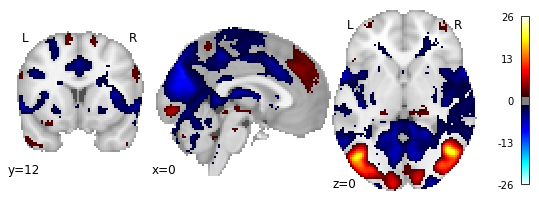

IC  Is Good  Notes Task        stat_img  \
1  IC_02     True    NaN  Soc  _zstat2.nii.gz   

                                        path_to_stat  
1  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

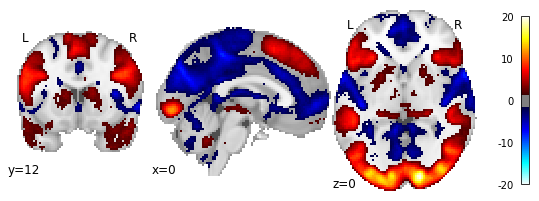

IC  Is Good  Notes Task        stat_img  \
2  IC_03     True    NaN  Soc  _zstat3.nii.gz   

                                        path_to_stat  
2  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

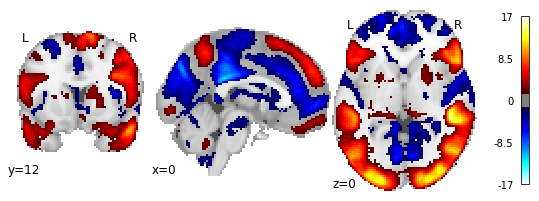

IC  Is Good  Notes Task        stat_img  \
3  IC_04     True    NaN  Soc  _zstat4.nii.gz   

                                        path_to_stat  
3  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

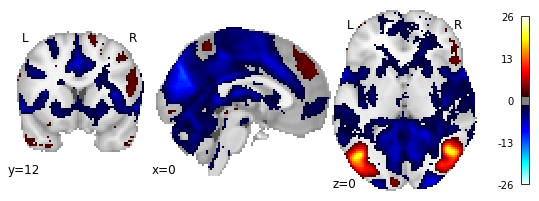

IC  Is Good  Notes Task        stat_img  \
4  IC_05     True    NaN  Soc  _zstat5.nii.gz   

                                        path_to_stat  
4  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

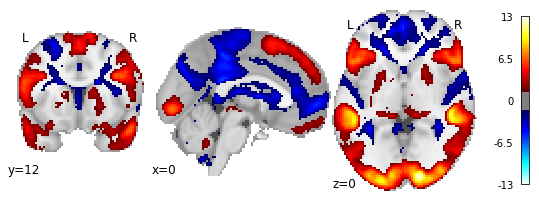

IC  Is Good  Notes Task        stat_img  \
5  IC_06     True    NaN  Soc  _zstat6.nii.gz   

                                        path_to_stat  
5  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

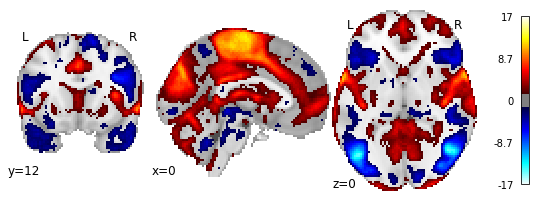

IC  Is Good  Notes Task        stat_img  \
6  IC_07     True    NaN  Soc  _zstat7.nii.gz   

                                        path_to_stat  
6  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

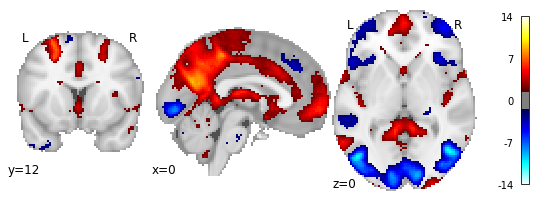

IC  Is Good  Notes Task        stat_img  \
7  IC_08     True    NaN  Soc  _zstat8.nii.gz   

                                        path_to_stat  
7  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

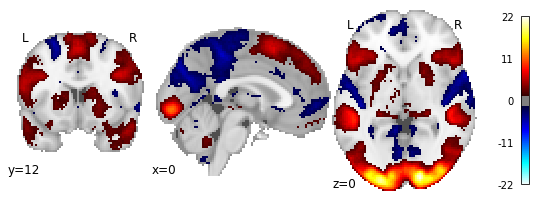

IC  Is Good  Notes Task        stat_img  \
8  IC_09     True    NaN  Soc  _zstat9.nii.gz   

                                        path_to_stat  
8  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

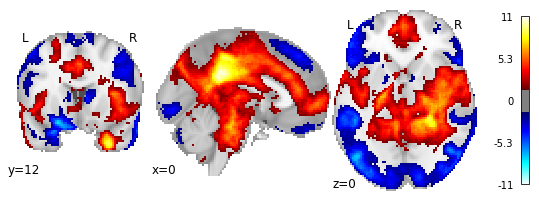

IC  Is Good  Notes Task         stat_img  \
9  IC_10     True    NaN  Soc  _zstat10.nii.gz   

                                        path_to_stat  
9  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

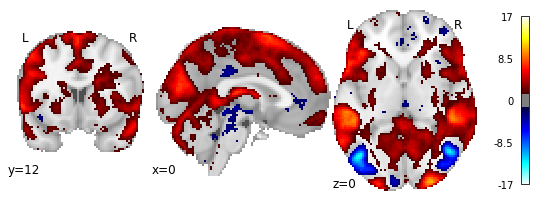

IC  Is Good  Notes Task         stat_img  \
10  IC_11     True    NaN  Soc  _zstat11.nii.gz   

                                         path_to_stat  
10  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

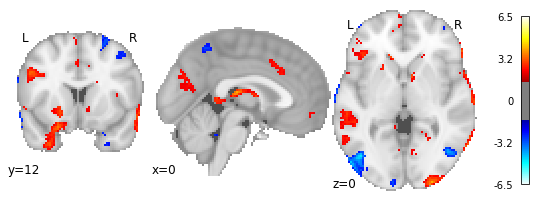

IC  Is Good  Notes Task         stat_img  \
11  IC_12     True    NaN  Soc  _zstat12.nii.gz   

                                         path_to_stat  
11  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

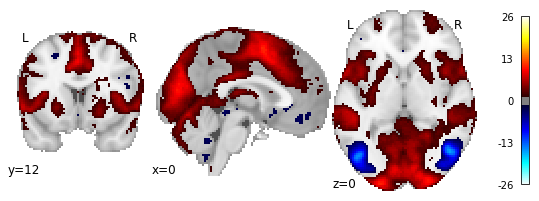

IC  Is Good  Notes Task         stat_img  \
12  IC_13     True    NaN  Soc  _zstat13.nii.gz   

                                         path_to_stat  
12  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

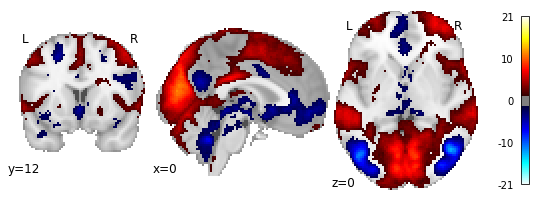

IC  Is Good  Notes Task         stat_img  \
13  IC_14     True    NaN  Soc  _zstat14.nii.gz   

                                         path_to_stat  
13  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

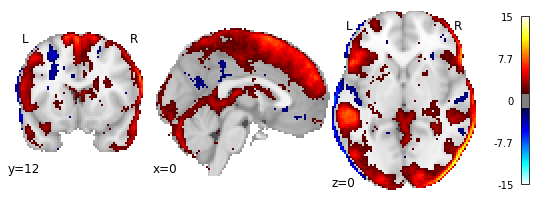

IC  Is Good  Notes Task         stat_img  \
14  IC_15     True    NaN  Soc  _zstat15.nii.gz   

                                         path_to_stat  
14  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

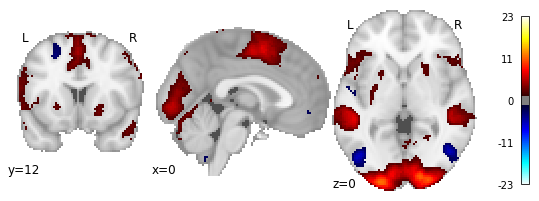

IC  Is Good  Notes Task         stat_img  \
15  IC_16     True    NaN  Soc  _zstat16.nii.gz   

                                         path_to_stat  
15  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

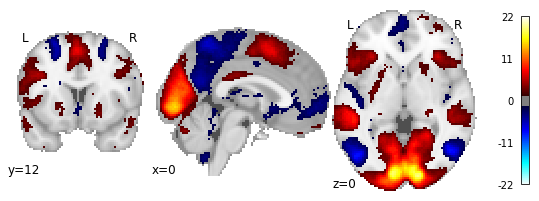

IC  Is Good  Notes Task         stat_img  \
16  IC_17     True    NaN  Soc  _zstat17.nii.gz   

                                         path_to_stat  
16  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

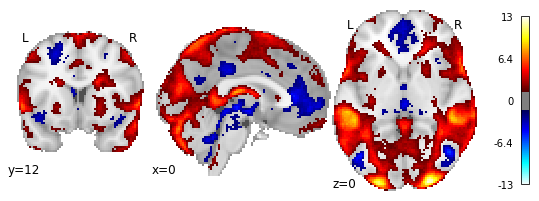

IC  Is Good  Notes Task         stat_img  \
17  IC_18     True    NaN  Soc  _zstat18.nii.gz   

                                         path_to_stat  
17  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

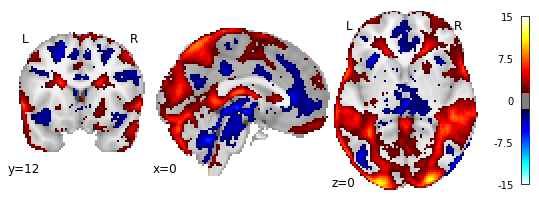

IC  Is Good  Notes Task         stat_img  \
18  IC_19     True    NaN  Soc  _zstat19.nii.gz   

                                         path_to_stat  
18  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

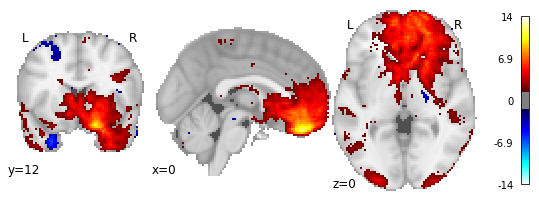

IC  Is Good  Notes Task         stat_img  \
19  IC_20     True    NaN  Soc  _zstat20.nii.gz   

                                         path_to_stat  
19  Post-Melodic/Exp1/tica_20dim_task-Soc_LindseyS...

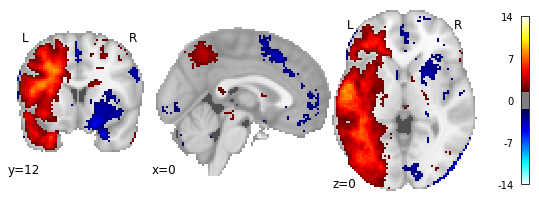

IC  Is Good  Notes Task        stat_img  \
0  IC_01     True    NaN  Gam  _zstat1.nii.gz   

                                        path_to_stat  
0  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

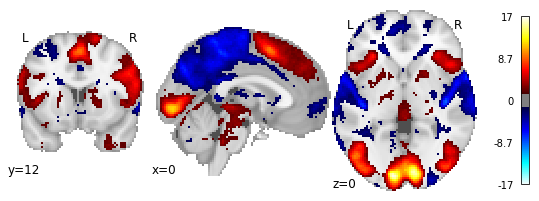

IC  Is Good  Notes Task        stat_img  \
1  IC_02     True    NaN  Gam  _zstat2.nii.gz   

                                        path_to_stat  
1  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

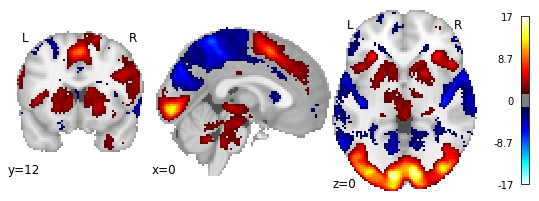

IC  Is Good  Notes Task        stat_img  \
2  IC_03     True    NaN  Gam  _zstat3.nii.gz   

                                        path_to_stat  
2  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

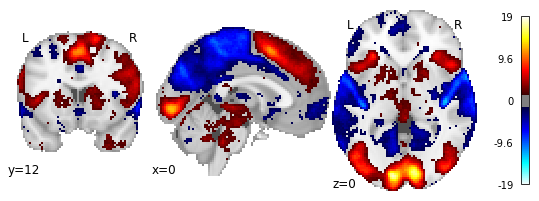

IC  Is Good  Notes Task        stat_img  \
3  IC_04     True    NaN  Gam  _zstat4.nii.gz   

                                        path_to_stat  
3  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

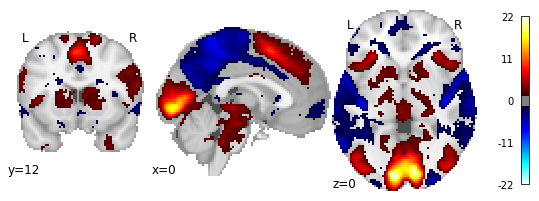

IC  Is Good  Notes Task        stat_img  \
4  IC_05     True    NaN  Gam  _zstat5.nii.gz   

                                        path_to_stat  
4  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

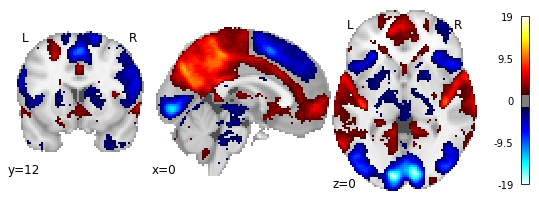

IC  Is Good  Notes Task        stat_img  \
5  IC_06     True    NaN  Gam  _zstat6.nii.gz   

                                        path_to_stat  
5  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

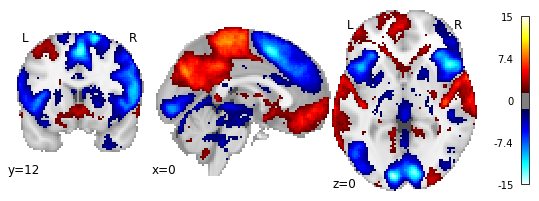

IC  Is Good  Notes Task        stat_img  \
6  IC_07     True    NaN  Gam  _zstat7.nii.gz   

                                        path_to_stat  
6  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

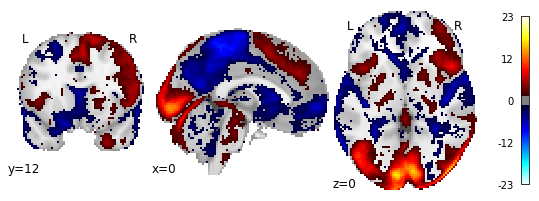

IC  Is Good  Notes Task        stat_img  \
7  IC_08     True    NaN  Gam  _zstat8.nii.gz   

                                        path_to_stat  
7  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

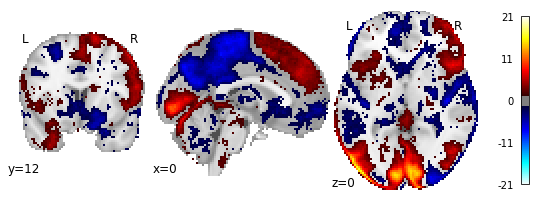

IC  Is Good  Notes Task        stat_img  \
8  IC_09     True    NaN  Gam  _zstat9.nii.gz   

                                        path_to_stat  
8  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

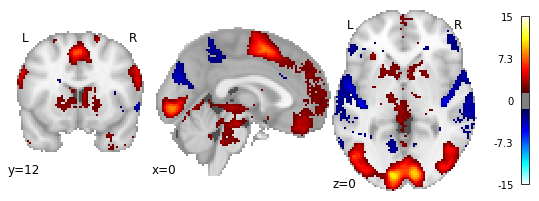

IC  Is Good  Notes Task         stat_img  \
9  IC_10     True    NaN  Gam  _zstat10.nii.gz   

                                        path_to_stat  
9  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

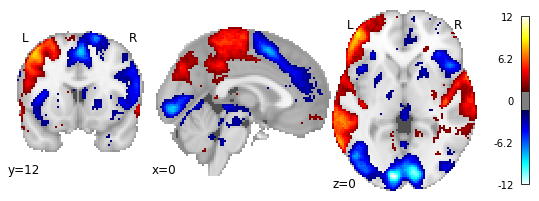

IC  Is Good  Notes Task         stat_img  \
10  IC_11     True    NaN  Gam  _zstat11.nii.gz   

                                         path_to_stat  
10  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

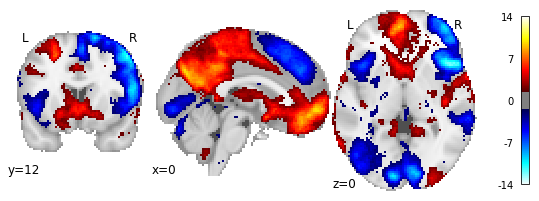

IC  Is Good  Notes Task         stat_img  \
11  IC_12     True    NaN  Gam  _zstat12.nii.gz   

                                         path_to_stat  
11  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

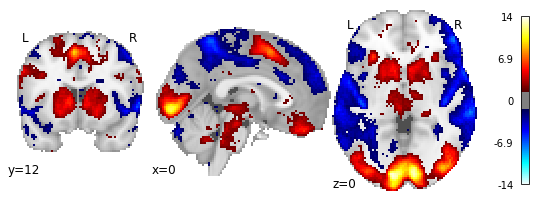

IC  Is Good  Notes Task         stat_img  \
12  IC_13     True    NaN  Gam  _zstat13.nii.gz   

                                         path_to_stat  
12  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

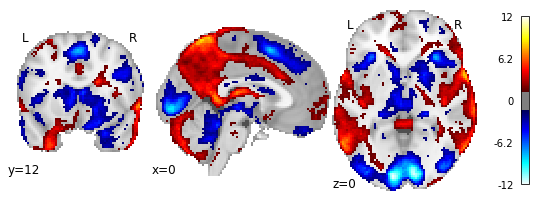

IC  Is Good  Notes Task         stat_img  \
13  IC_14     True    NaN  Gam  _zstat14.nii.gz   

                                         path_to_stat  
13  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

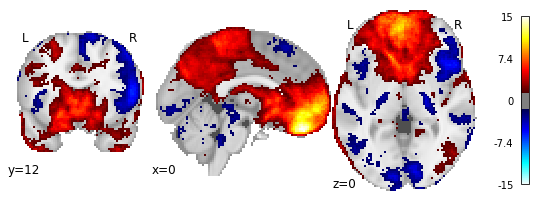

IC  Is Good  Notes Task         stat_img  \
14  IC_15     True    NaN  Gam  _zstat15.nii.gz   

                                         path_to_stat  
14  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

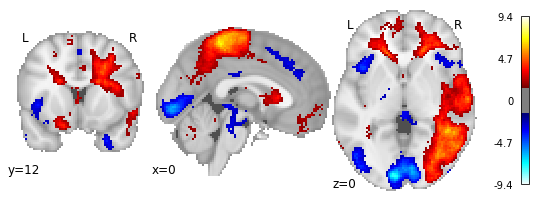

IC  Is Good  Notes Task         stat_img  \
15  IC_16     True    NaN  Gam  _zstat16.nii.gz   

                                         path_to_stat  
15  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

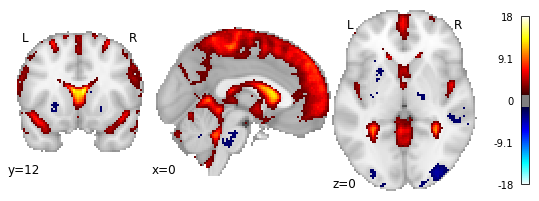

IC  Is Good  Notes Task         stat_img  \
16  IC_17     True    NaN  Gam  _zstat17.nii.gz   

                                         path_to_stat  
16  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

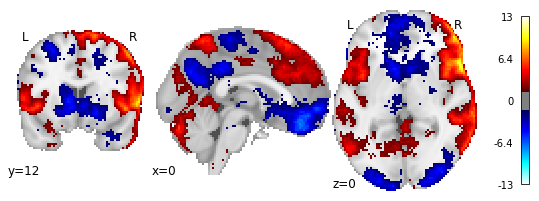

IC  Is Good  Notes Task         stat_img  \
17  IC_18     True    NaN  Gam  _zstat18.nii.gz   

                                         path_to_stat  
17  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

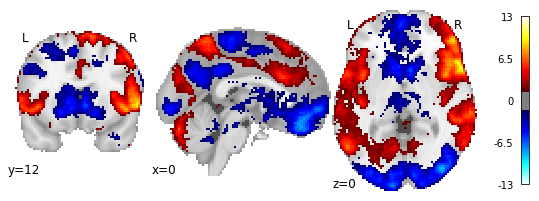

IC  Is Good  Notes Task         stat_img  \
18  IC_19     True    NaN  Gam  _zstat19.nii.gz   

                                         path_to_stat  
18  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

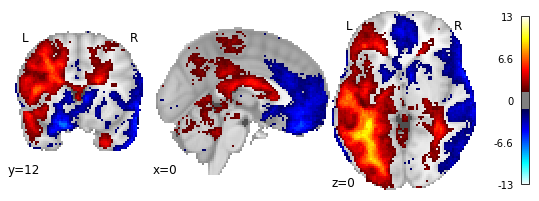

IC  Is Good  Notes Task         stat_img  \
19  IC_20     True    NaN  Gam  _zstat20.nii.gz   

                                         path_to_stat  
19  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...

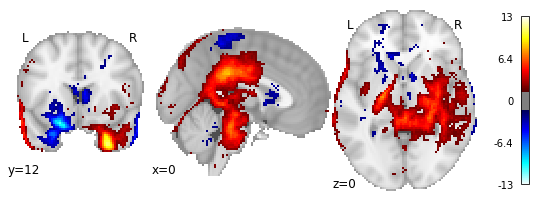

In [4]:
# Hand Classify Components
import nilearn.plotting
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt

hand_class=[]
for out in tica_output:
    file=[out+'/'+fname for fname in os.listdir(out) if 'Classified' in fname][0]
    task=re.search("task-(.*?)_",out).group(1) 
    statimages=natsorted([os.path.join(root,f) for root,dirs,files in os.walk(out)
             for f in files if f.startswith("thresh_zstat")])
    tmp=pd.read_csv(file)
    tmp['Task']=task
    tmp['stat_img']=[re.search("thresh(.*)",img).group(1) for img in statimages]
    tmp['path_to_stat']=statimages
    
    hand_class.append(tmp)
hand_class=pd.concat(hand_class)

print(color.BOLD+" %s out of %s "%(len(hand_class[hand_class['Is Good']==True])
                                   ,len(hand_class))+color.END+"components in: \n  %s Output"%(out))

for img in hand_class['path_to_stat']:
    display(hand_class[hand_class['path_to_stat']==img])
    nilearn.plotting.plot_stat_map(img,cut_coords=[0,12,0],draw_cross=False,threshold=1.5)
    plt.show()


### Exp1: (Human Connectome Data)
> If you want an interactive map for more spatial detail name it in the cell below:
>- Warning variables get renamed in Exp2 so run cells in order

IC  Is Good  Notes Task        stat_img  \
0  IC_01     True    NaN  Gam  _zstat1.nii.gz   

                                        path_to_stat  
0  Post-Melodic/Exp1/tica_20dim_task-Gam_LindseyS...


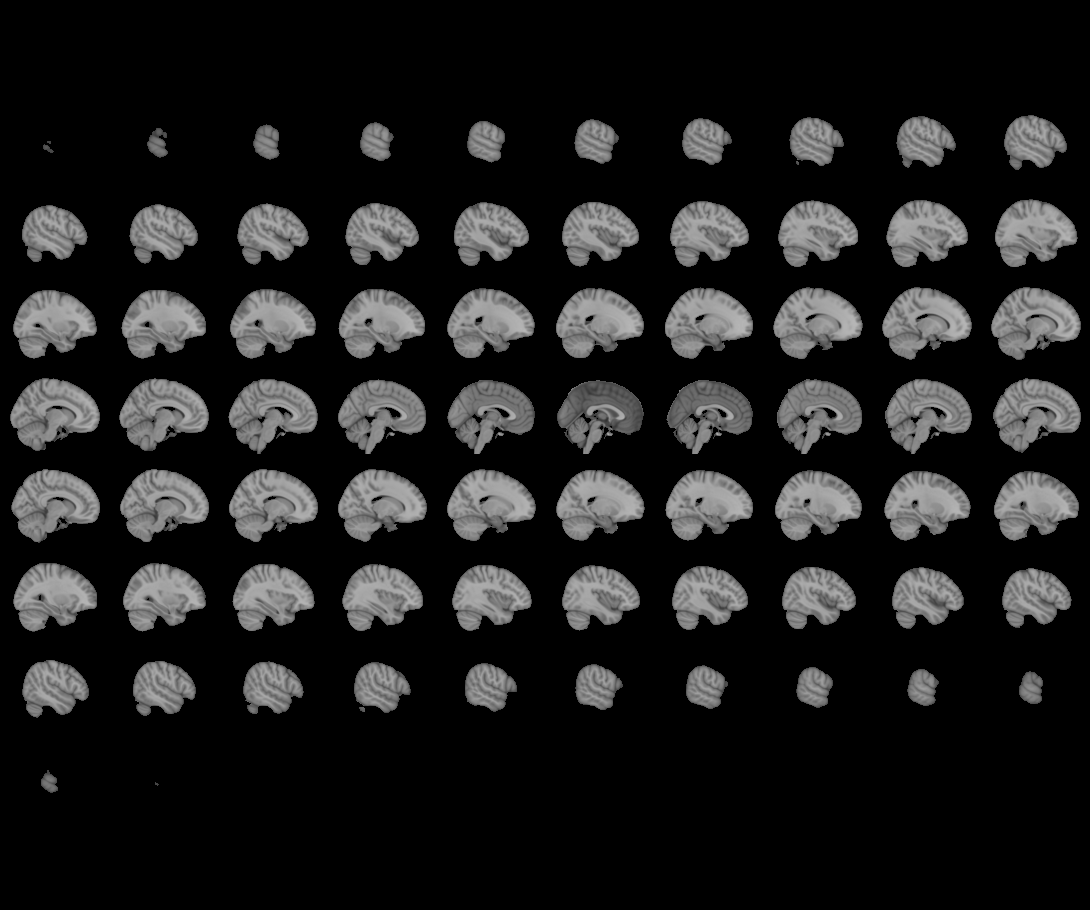
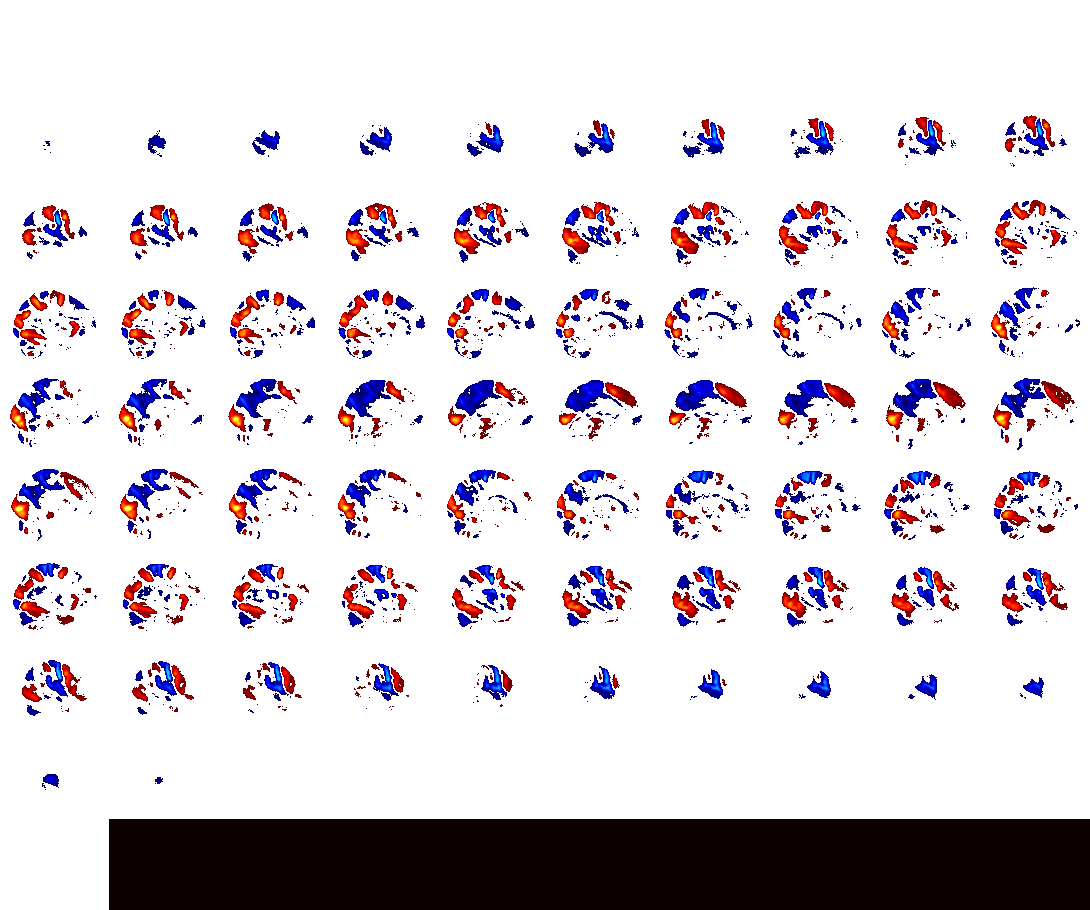

In [5]:
#Us the name from the output under IC bellow
IWantABetterLookAt,task="IC_01","Gam"
row=hand_class[(hand_class['IC']==IWantABetterLookAt)&
               (hand_class['Task']==task)].copy()
fname=row['path_to_stat'].iloc[0]
display(row)
nilearn.plotting.view_img(fname,draw_cross=False,title=IWantABetterLookAt)

### Exp1: (Human Connectome Data)
> Make PALM Files

| Subject Mode      | Temporal Mode Fit  |             
|:------------|:---------------|
|<ul><li> Gamble Task &check; | <ul><li> Gamble Task &check;|
|<ul><li> Social Task  &check; | <ul><li> Social Task &check;|


In [6]:
##################___________Make PALM FILES____________##############

reg_list=[]
for results in tica_output: # Experiment 1 has 2 tasks to deal with.
    print(results)
    task=re.search('task-(.*?)_',results).group(1)
    handclass=hand_class[hand_class['Task']==task].copy()

    #Get subject number in order from tica logfiles___________________________________
    log_file = open(results+'/log.txt', 'r') 
    Lines = log_file.readlines()
    log_file.close()
    subs=[]
    for line in Lines:
        if line.startswith("Excluding voxels with constant value"):
            break
        elif line.startswith("Reading data file"):
            subs.append('sub-'+re.search('sub-(.*)_task',line).group(1))
            
#SUBJECT MODE ________________________________________________________________________

    #Import Smodes Name Columns add Subject numbers and get rid of noise components
    # We don't skip anyrows for this file
    smodes=pd.read_csv(results+'/melodic_Smodes',
                       delim_whitespace=True,header=None)#,skiprows=1
    colnames=['IC_%02d'%(i+1) for i,col in enumerate(smodes.columns)]#give columns names
    smodes.columns=colnames
    smodes['Subject']=subs #add subject number
    
    drop_columns=[IC for IC in handclass[handclass['Is Good']==False]['IC'].values]
    drop_columns.append('Subject')
    smodes.drop(columns=drop_columns).to_csv(
        'Post-Melodic/Code/PALM/Exp1/ForPALM_%s_task-%s_smode.csv'%(EXP,task),header=False,index=False)

#Temporal Mode________________________________________________________________________    
    #1.) Organize task information 
    
    design_df=[]
    for run in ['LR','RL']: #Both Runs of Info get concatonated but different columnnames
        if task=='Gam':
            tmp=pd.read_csv('Post-Melodic/Exp1/L1_task-%s_run-%s_design.mat'%(task,run),skiprows=5,sep='\t',
                       header=None,names=['Gains','Losses','DropThis'])
            tmp=tmp[['Gains','Losses']]
            design_df.append(tmp.copy())
        if task=='Soc':
            tmp=pd.read_csv('Post-Melodic/Exp1/L1_task-%s_run-%s_design.mat'%(task,run),skiprows=5,sep='\t',
                       header=None,names=['Mental','non_social','DropThis'])
            tmp=tmp[['Mental','non_social']]
            design_df.append(tmp.copy())
            
    design_df=pd.concat(design_df)
    
    # 2.) Get the temporal mode info
    # 2.) a. Get a list of the tmode files from the report section
    files=[results+'/report/'+f for f in os.listdir(results+'/report/') if f.startswith('t') if f.endswith('.txt')]
    
    df_list=[]
    #2.) b. Attach Temporal mode to subject and group Should be same order as going in 
            # minus the first row which is the mean
    for row in sub_data.iterrows():
        #display(row[1])
        tdf=design_df
        tdf['sub']=row[1]['Subject']
        tdf['group']=row[1]['groups']
        df_list.append(tdf.copy())

    tmode_df=pd.concat(df_list).reset_index(drop=True)
    # 2.) c. Read temporal weights and zscore them
    for f in natsorted(files):

        Tweight_df=pd.read_csv(f,delim_whitespace=True,
                               header=None,names=subs)
        Tweight_df.reset_index(drop=True,inplace=True)
        Zweight_df=Tweight_df.apply(zscore)
        tmode_df['IC_%02d'%(int(
            re.search('report/t(.*).txt',f).group(1)))]=Zweight_df.melt()['value']
    tmode_df.to_csv(
        'Post-Melodic/Code/PALM/Exp1/Tmodes-Unfit_task-%s.csv'%(task))
    
    # 3.) Running a regression on the temporal mode for each subject
    data=[]
    if task== 'Soc':
        conditions=['Mental','non_social']
    elif task=='Gam':
        conditions=['Gains','Losses']

    for IC in handclass['IC'].values:
        row=[]
        for sub in natsorted(tmode_df['sub'].unique()):
            t_df=tmode_df[tmode_df['sub']==sub].copy()
            e1="%s ~ %s + %s"%(IC,conditions[0],conditions[1])
            model1 = gls(e1, t_df).fit()
            row.append([sub,t_df.group.unique()[0],
                        IC,model1.params[conditions[0]],
                        model1.params[conditions[1]]])
        row=np.array(row)
        data.append(row)
        
# Prepare Data for PALM__________________________________________________________________    
    reg_df=pd.DataFrame(columns=['sub','group','IC',conditions[0],conditions[1]],
                        data=np.concatenate(data))
    reg_df[conditions[0]]=pd.to_numeric(reg_df[conditions[0]])
    reg_df[conditions[1]]=pd.to_numeric(reg_df[conditions[1]])
    reg_df['Diff']=reg_df[conditions[0]]-reg_df[conditions[1]]
    reg_df['Task']=task
    
    reg_list.append(reg_df.copy())
    pivot_df=reg_df[['sub','IC','Diff']]
    pivot_df=pivot_df.pivot('sub','IC')
    columns=[item for item in handclass[handclass['Is Good']==True].IC.values]
    pivot_df=pivot_df['Diff'][columns]

    pivot_df.to_csv('Post-Melodic/Code/PALM/Exp1/Fit_T_beta-Diff_task-%s.csv'%(task),
                    index=False,header=False)
    pivot_df.to_csv('Post-Melodic/Code/PALM/Exp1/Fit_T_beta_withHeader-Diff_task-%s.csv'%(task),
                    index=False)
    display(pivot_df)
reg_df=pd.concat(reg_list)
    

Post-Melodic/Exp1/tica_20dim_task-Soc_LindseySubs_sm-2_merged_z.ica


IC             IC_01     IC_02     IC_03     IC_04     IC_05     IC_06  \
sub                                                                      
sub-100206 -0.035203  0.220839  0.432527  0.061525  0.400141 -0.306337   
sub-100307 -0.150916  0.110658  0.211913 -0.106518  0.079321 -0.236595   
sub-101107  0.060485 -0.164087 -0.039478  0.300188 -0.365103 -0.653055   
sub-101915  0.091599  0.336986  0.529250  0.193124  0.538496 -0.308574   
sub-102311  0.109730  0.522761  0.832245  0.332206  0.796571 -0.793770   
...              ...       ...       ...       ...       ...       ...   
sub-973770 -0.161916  0.268233  0.087029 -0.238023  0.364525 -0.296004   
sub-978578  0.619891  0.940433  1.367098  0.768239  1.334136 -0.965343   
sub-991267 -0.130696  0.143439  0.481641  0.015591  0.389779 -0.355251   
sub-993675 -0.213557  0.032048  0.418953 -0.050827  0.323579 -0.167708   
sub-996782 -0.075398  0.368028  0.563996  0.034073  0.657410 -0.325540   

IC             IC_07     IC_08     IC_09     IC_10     IC_11     IC_12  \
sub                                                                      
sub-100206  0.171936  0.293653 -0.095104  0.296408  0.294913 -0.140161   
sub-100307  0.232381  0.153454 -0.090268  0.248615  0.129626 -0.179395   
sub-101107 -0.380288 -0.202197 -0.245144 -0.850961 -0.383079 -0.914483   
sub-101915 -0.131886  0.364644 -0.674615  0.249965 -0.009074 -0.028441   
sub-102311 -0.086500  0.562976 -0.775716  0.400168  0.123554 -0.111457   
...              ...       ...       ...       ...       ...       ...   
sub-973770 -0.060307  0.367662 -0.421016  0.402109  0.617564  0.115904   
sub-978578 -0.414696  0.958573 -0.851834  0.050860 -0.479227 -0.365368   
sub-991267  0.457406  0.167059 -0.183946  0.620306  0.512249 -0.200081   
sub-993675  0.485017  0.055918 -0.208282  0.612661  0.657849 -0.233754   
sub-996782  0.065930  0.526308 -0.363658  0.374488  0.214581 -0.129003   

IC             IC_13     IC_14     IC_15     IC_16     IC_17     IC_18  \
sub                                                                      
sub-100206 -0.398137 -0.026948  0.156504 -0.026690  0.329979  0.216263   
sub-100307 -0.185776 -0.166668 -0.107342 -0.099266  0.298237  0.060911   
sub-101107 -0.566016 -0.716147 -0.798700 -0.551571 -0.216812 -0.096039   
sub-101915 -0.096718  0.058219  0.238819  0.087162  0.660309  0.467006   
sub-102311 -0.327674  0.099051  0.281505  0.185498  0.397990  0.259409   
...              ...       ...       ...       ...       ...       ...   
sub-973770  0.053299  0.087955  0.179302  0.544474  0.222789 -0.334952   
sub-978578 -0.608835  0.736010  0.441795  0.050192  0.590375  0.486398   
sub-991267 -0.442922  0.154541 -0.033085 -0.125826  0.493047  0.194056   
sub-993675 -0.499046  0.147922 -0.103082 -0.399536  0.464400  0.010295   
sub-996782 -0.221817  0.238838  0.207208  0.277630  0.721404  0.196124   

IC             IC_19     IC_20  
sub                             
sub-100206 -0.316307  0.319906  
sub-100307  0.772480  0.799902  
sub-101107  0.285004  0.219145  
sub-101915 -0.044453 -0.017388  
sub-102311  0.351351  0.288068  
...              ...       ...  
sub-973770  0.075526 -0.076021  
sub-978578 -0.227294  0.712877  
sub-991267  0.104573 -0.192299  
sub-993675 -0.578346  0.463114  
sub-996782  0.878505 -0.018106  

[279 rows x 20 columns]

Post-Melodic/Exp1/tica_20dim_task-Gam_LindseySubs_sm-2_merged_z.ica


IC             IC_01     IC_02     IC_03     IC_04     IC_05     IC_06  \
sub                                                                      
sub-100206  0.134337  0.138533  0.107021  0.087614 -0.098894 -0.158968   
sub-100307  0.289155  0.245207  0.268953  0.252810 -0.251811 -0.335730   
sub-101107  0.013967  0.168746  0.318629 -0.002815 -0.358813 -0.090692   
sub-101915  0.208149  0.225361  0.291316  0.145487 -0.228499 -0.395448   
sub-102311 -0.077370 -0.119772 -0.166917 -0.077090  0.116367 -0.035399   
...              ...       ...       ...       ...       ...       ...   
sub-973770  0.199518  0.279096  0.271370  0.313357 -0.279221 -0.145832   
sub-978578  0.027115 -0.038733 -0.086849  0.064364  0.025143 -0.003996   
sub-991267  0.138705  0.167764  0.255064  0.137500 -0.277536 -0.076283   
sub-993675 -0.154990 -0.224753 -0.208348 -0.269003  0.261671  0.180034   
sub-996782  0.181928  0.193808  0.197373  0.155388 -0.149829 -0.186943   

IC             IC_07     IC_08     IC_09     IC_10     IC_11     IC_12  \
sub                                                                      
sub-100206  0.066422  0.213910  0.095473 -0.079922 -0.179986  0.020341   
sub-100307  0.164929  0.226435  0.257811 -0.201522 -0.334191  0.246056   
sub-101107 -0.054909 -0.098318  0.120175  0.008075 -0.029822  0.117083   
sub-101915  0.224578  0.204716  0.135414 -0.152106 -0.381134  0.116065   
sub-102311 -0.034347  0.011982 -0.084914  0.063239 -0.053686 -0.192929   
...              ...       ...       ...       ...       ...       ...   
sub-973770  0.115690  0.058453  0.126586 -0.250597 -0.113211  0.310548   
sub-978578  0.185265 -0.389691  0.304650 -0.154744  0.236793  0.185795   
sub-991267  0.077938  0.044994  0.126668 -0.008859 -0.123205  0.245729   
sub-993675 -0.163579 -0.354199 -0.211008  0.242469  0.080168 -0.169011   
sub-996782  0.035315  0.228841  0.218323 -0.098615 -0.019926  0.300108   

IC             IC_13     IC_14     IC_15     IC_16     IC_17     IC_18  \
sub                                                                      
sub-100206 -0.052924 -0.115574 -0.203995 -0.125361  0.217527  0.244442   
sub-100307 -0.229342 -0.289495 -0.188904 -0.053133  0.268153  0.240242   
sub-101107 -0.322046  0.048534 -0.134690  0.097457 -0.498194 -0.338399   
sub-101915 -0.092238 -0.617293 -0.191323 -0.083288  0.486587  0.414468   
sub-102311  0.109224  0.061625  0.277203  0.476822  0.323121  0.401347   
...              ...       ...       ...       ...       ...       ...   
sub-973770 -0.313393 -0.157732 -0.574544 -0.331539 -0.181555 -0.484970   
sub-978578  0.018376 -0.196955  0.233097  0.267567 -0.338043 -0.040588   
sub-991267 -0.148030 -0.081372 -0.139968 -0.154624 -0.219964 -0.374834   
sub-993675  0.270399 -0.123673  0.342936  0.240512  0.123461  0.127037   
sub-996782 -0.092014 -0.004311  0.259544 -0.240404 -0.020594  0.027114   

IC             IC_19     IC_20  
sub                             
sub-100206 -0.221367 -0.085991  
sub-100307  0.253123  0.280054  
sub-101107 -0.583335  0.019949  
sub-101915  0.398227  0.176532  
sub-102311 -0.084986  0.849759  
...              ...       ...  
sub-973770 -0.281086 -0.258608  
sub-978578 -0.086962 -0.368994  
sub-991267  0.293135  0.516239  
sub-993675  0.346349 -0.280680  
sub-996782  0.723003  0.727217  

[279 rows x 20 columns]

### Experiment 1: HCP Data
> Run PALM on Both Tasks

In [ ]:
./palm-alpha115/palm -i $Input -d design.mat -t design.con  -eb EB.csv -o /data/projects/ppi-effect-sizes/fsl/HCP_2019_L3_Revised_Output/PALM/PALM_DM3_Act_Soc_Cope1_TPJ -n 5000 -corrcon -logp -T

In [7]:
Input='Post-Melodic/Code/PALM/Exp1/Fit_T_beta-Diff_task-Soc.csv'
Output='Post-Melodic/Code/PALM/Exp1/Soc_results/'
!./palm-alpha118/palm -i $Input -o $Output -twotail -quiet -logp -corrcon

Input='Post-Melodic/Code/PALM/Exp1/Fit_T_beta-Diff_task-Gam.csv'
Output='Post-Melodic/Code/PALM/Exp1/Gam_results/'
!./palm-alpha118/palm -i $Input -o $Output -twotail -quiet -logp -corrcon

palm_list=[]
for task in ['Gam','Soc']:
    handclass=hand_class[hand_class['Task']==task].copy()
    names=[IC for IC in handclass[handclass['Is Good']==True]['IC']]
    palm_df=[]
    Output='Post-Melodic/Code/PALM/Exp1/%s_results/'%(task)
    for f in [Output+f for f in os.listdir(Output) if 'tstat' in f]:
        t=pd.read_csv(f,names=names)
        t['file']=re.search('tstat(.*)',f).group(0)
        palm_df.append(t)
    palm_df=pd.concat(palm_df)
    palm_df['Task']=task
    palm_list.append(palm_df.melt(id_vars=['file','Task'],var_name='IC',value_name='stat'))
palm_df=pd.concat(palm_list)
display(palm_df)

             ___         ___                         ___
            /  /\       /  /\                       /__/\
           /  /::\     /  /::\                     |  |::\
          /  /:/\:\   /  /:/\:\    ___     ___     |  |:|:\
         /  /:/~/:/  /  /:/~/::\  /__/\   /  /\  __|__|:|\:\
        /__/:/ /:/  /__/:/ /:/\:\ \  \:\ /  /:/ /__/::::| \:\
        \  \:\/:/   \  \:\/:/__\/  \  \:\  /:/  \  \:\~~\__\/
         \  \::/     \  \::/        \  \:\/:/    \  \:\
          \  \:\      \  \:\         \  \::/      \  \:\
           \  \:\      \  \:\         \__\/        \  \:\
            \__\/       \__\/                       \__\/

                 Permutation Analysis of Linear Models
Running PALM alpha118
 using Octave 5.2.0 with the following options:
-i Post-Melodic/Code/PALM/Exp1/Fit_T_beta-Diff_task-Soc.csv
-o Post-Melodic/Code/PALM/Exp1/Soc_results/
-twotail
-quiet
-logp
-corrcon
Found FSL in /usr/local/fsl
Reading input 1/1: Post-Melodic/Code/PALM/Exp1/Fit_T_beta-Diff_

file Task     IC    stat
0     tstat_uncp_c1.csv  Gam  IC_01  4.0000
1     tstat_fwep_c1.csv  Gam  IC_01  4.0000
2     tstat_fwep_c2.csv  Gam  IC_01  4.0000
3          tstat_c1.csv  Gam  IC_01  9.6910
4    tstat_cfwep_c1.csv  Gam  IC_01  4.0000
..                  ...  ...    ...     ...
155        tstat_c1.csv  Soc  IC_20  3.9396
156  tstat_cfwep_c1.csv  Soc  IC_20  2.4949
157   tstat_uncp_c2.csv  Soc  IC_20  3.5229
158        tstat_c2.csv  Soc  IC_20 -3.9396
159  tstat_cfwep_c2.csv  Soc  IC_20  2.4949

[320 rows x 4 columns]

### Experiment 1: (Human Connectome)
> Quick Display Of Results

In [5]:
import seaborn as sms
stats_df=pd.merge(sub_data, smodes, on='Subject')

for task in palm_df['Task'].unique():
    
    for IC in palm_df[palm_df['Task']==task]['IC'].unique():
        display(palm_df[(palm_df['IC']==IC)&(palm_df['Task']==task)])
        plt_df=reg_df[reg_df['Task']==task].copy()
        plt_df=plt_df.drop(columns='Diff')
        plt_df = plt_df.dropna(axis=1)
        plt_df=plt_df[plt_df['IC']==IC]
        plt_df=plt_df.melt(id_vars=['sub','group','IC','Task'])

        nilearn.plotting.plot_stat_map(
            hand_class[hand_class['IC']==IC]['path_to_stat'].values[0],
            cut_coords=[0,12,0],draw_cross=False)
        plt.show()
        fig,((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
        ax1.set_title("Swarm Temporal Fit")
        ax2.set_title("Point Temporal Fit")
        ax3.set_title("Subject Mode by clinical Group")
        ax4.set_title("Correlation With Motion")
        
        sms.swarmplot(x='variable',y='value',data=plt_df,ax=ax1)
        sms.pointplot(x='variable',y='value',hue='group',data=plt_df,ax=ax2)
        sms.barplot(x='groups',y='%s'%(IC),data=stats_df,ax=ax3)
        plt.show()

NameError: name 'smodes' is not defined

### Experiment 1: (Human Connectome)
>Look at a specific Component

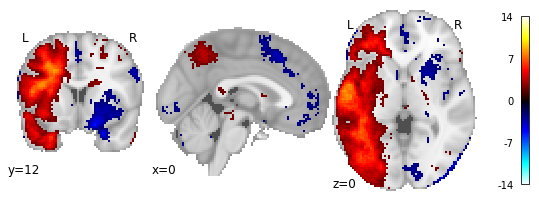

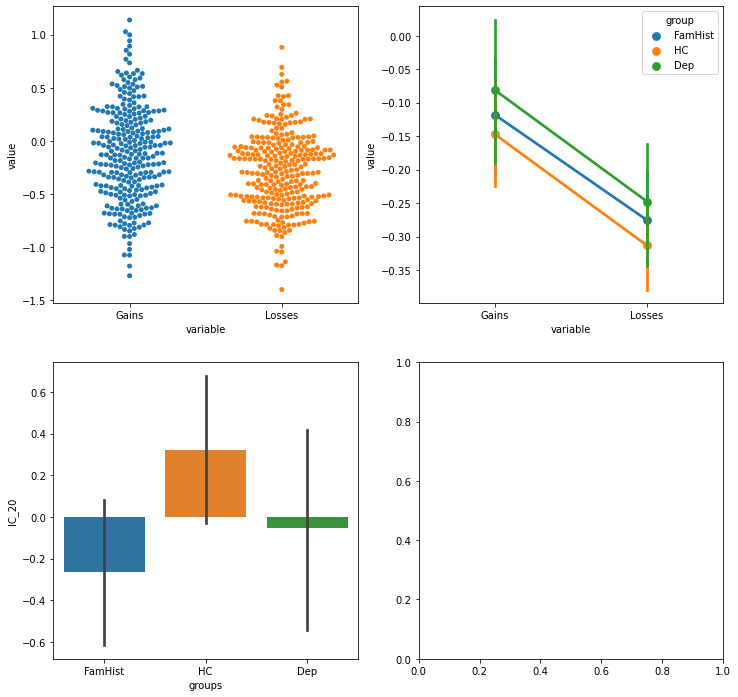

In [9]:
IC, task='IC_20', "Gam"
    
plt_df=reg_df[reg_df['Task']==task].copy()
plt_df=plt_df.drop(columns='Diff')
plt_df = plt_df.dropna(axis=1)
plt_df=plt_df[plt_df['IC']==IC]
plt_df=plt_df.melt(id_vars=['sub','group','IC','Task'])

nilearn.plotting.plot_stat_map(
    handclass[handclass['IC']==IC]['path_to_stat'].values[0],
    cut_coords=[0,12,0],draw_cross=False)
plt.show()
fig,((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
sms.swarmplot(x='variable',y='value',data=plt_df,ax=ax1)
sms.pointplot(x='variable',y='value',hue='group',data=plt_df,ax=ax2)
sms.barplot(x='groups',y='%s'%(IC),data=stats_df,ax=ax3)
plt.show()

=======================================================================================

# Post Melodic: Experiment 2
>Highres Rutgers Data
>- [x] Organize TICA Output
>- [x] Hand Classify Components
>- [?] Find Components that Track task

## Exp 2: Rutgers Data
### Organize Output

In [ ]:
# Organize TICA OUTPUT
# Which Experiment Are we Analyzing
import os
import re
from bids import BIDSLayout
EXP="Exp2" #Choose "Exp1" HCP Data "Exp2" Rutgers Data  or "Exp3" NARPS Data
tica_output=[os.path.join(root,d) for root,dirs,files in os.walk("Post-Melodic/"+EXP)
             for d in dirs if ((d.endswith(".ica"))&("dim-20" in d))]
out=tica_output[0]
task=[re.search("task-(.*?)_",output).group(1) for output in tica_output][0]
log_file = open(out+'/log.txt', 'r') 
Lines = log_file.readlines()
log_file.close()

runs=[]
subs=[]
for line in Lines:
    if line.startswith("Excluding voxels with constant value"):
        break
    elif line.startswith("Reading data file"):
        subs.append('sub-'+re.search('sub-(.*)/sub',line).group(1))
        runs.append('run-'+re.search('run-(.*)-Ord',line).group(1))
sr=[x+' '+ y for x, y in zip(subs, runs)]
data=np.array([subs,runs,sr]).T

sub_data=pd.DataFrame(data=data,columns=['Subject','Run','S-R'])

evs=[]
listoffiles=[os.path.join(d, x)
            for d, dirs, files in os.walk('Pre-Melodic/%s'%(EXP))
            for x in files if x.endswith("events.tsv")]

for f in natsorted(listoffiles):
    t=pd.read_csv(f,sep='\t')
    t['sub']='sub-'+re.search('sub-(.*?)/',f).group(1)
    t['run']=re.search('run-(.*?)_',f).group(1)
    evs.append(t)
evs=pd.concat(evs)
#display(evs)
     
evs=evs[evs['trial_type']!='choice'].reset_index(drop=True)

evs =pd.merge(
    left=evs,
    right=pd.get_dummies(evs['trial_type']),
    left_index=True,
    right_index=True).copy()
multi_table([sub_data.head(10),evs.head(10)])
#Take out non Melodic Subs
evs=evs[evs['sub'].isin(subs)]
len(evs)

## Exp 2: Rutgers Data
### Classify Components

15 of 20 components are good in: 
  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card_dim-20.ica Output


IC  IsGood Notes        stat_img  \
0  IC_01    True   NaN  _zstat1.nii.gz   

                                        path_to_stat  
0  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

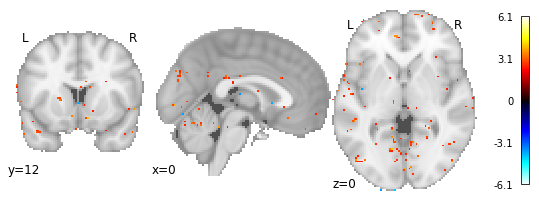

IC  IsGood Notes        stat_img  \
1  IC_02    True   NaN  _zstat2.nii.gz   

                                        path_to_stat  
1  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

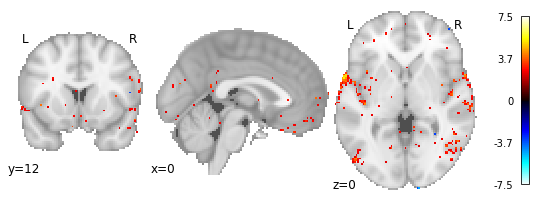

IC  IsGood Notes        stat_img  \
2  IC_03    True   NaN  _zstat3.nii.gz   

                                        path_to_stat  
2  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

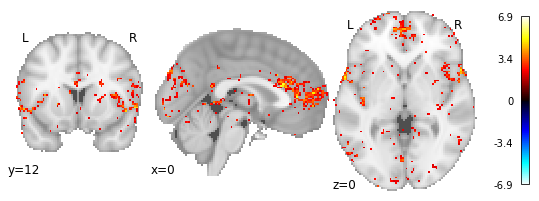

IC  IsGood Notes        stat_img  \
3  IC_04    True   NaN  _zstat4.nii.gz   

                                        path_to_stat  
3  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

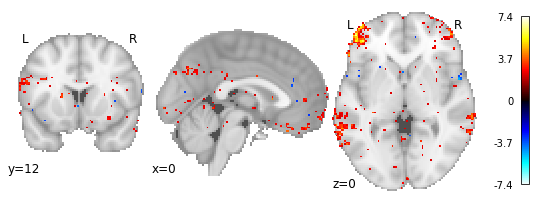

IC  IsGood Notes        stat_img  \
4  IC_05    True   NaN  _zstat5.nii.gz   

                                        path_to_stat  
4  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

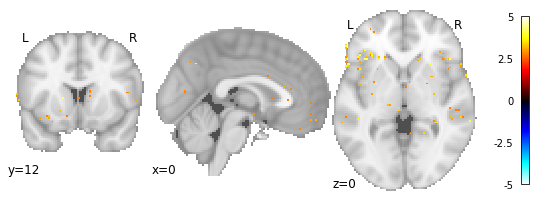

IC  IsGood Notes        stat_img  \
5  IC_06    True   NaN  _zstat6.nii.gz   

                                        path_to_stat  
5  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

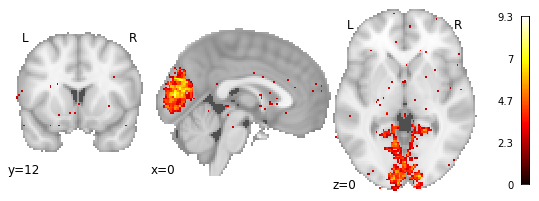

IC  IsGood Notes        stat_img  \
6  IC_07   False  Line  _zstat7.nii.gz   

                                        path_to_stat  
6  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

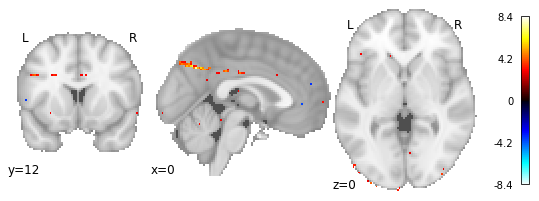

IC  IsGood Notes        stat_img  \
7  IC_08    True   NaN  _zstat8.nii.gz   

                                        path_to_stat  
7  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

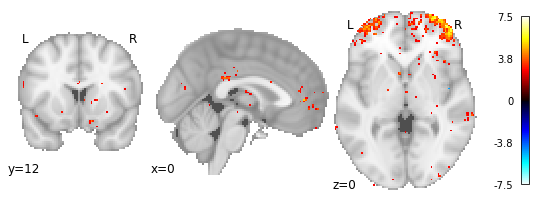

IC  IsGood Notes        stat_img  \
8  IC_09   False  Line  _zstat9.nii.gz   

                                        path_to_stat  
8  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

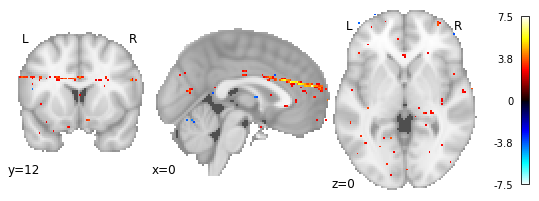

IC  IsGood Notes         stat_img  \
9  IC_10   False  Line  _zstat10.nii.gz   

                                        path_to_stat  
9  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

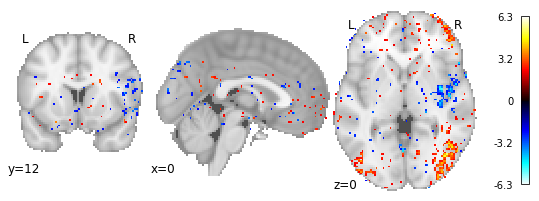

IC  IsGood Notes         stat_img  \
10  IC_11   False  Line  _zstat11.nii.gz   

                                         path_to_stat  
10  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

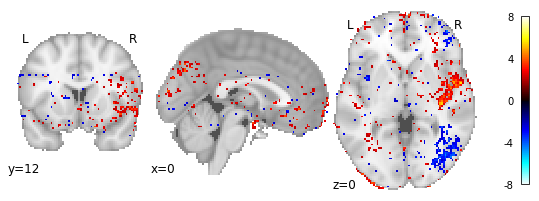

IC  IsGood Notes         stat_img  \
11  IC_12    True   NaN  _zstat12.nii.gz   

                                         path_to_stat  
11  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

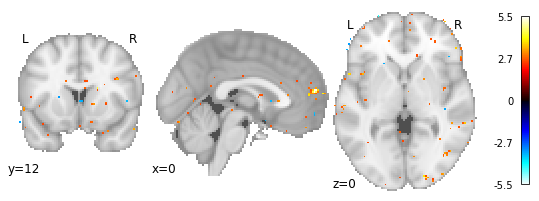

IC  IsGood Notes         stat_img  \
12  IC_13    True   NaN  _zstat13.nii.gz   

                                         path_to_stat  
12  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

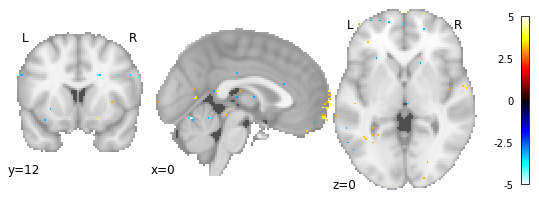

IC  IsGood Notes         stat_img  \
13  IC_14    True   NaN  _zstat14.nii.gz   

                                         path_to_stat  
13  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

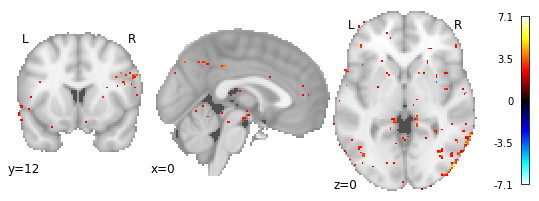

IC  IsGood Notes         stat_img  \
14  IC_15    True   NaN  _zstat15.nii.gz   

                                         path_to_stat  
14  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

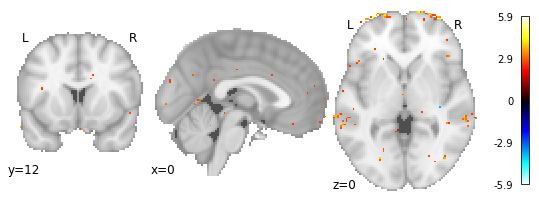

IC  IsGood Notes         stat_img  \
15  IC_16    True   NaN  _zstat16.nii.gz   

                                         path_to_stat  
15  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

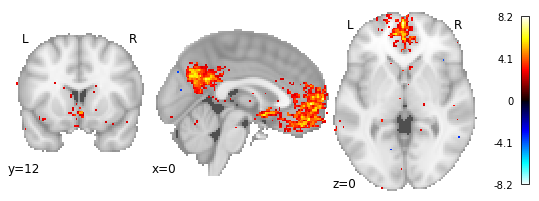

IC  IsGood Notes         stat_img  \
16  IC_17    True   NaN  _zstat17.nii.gz   

                                         path_to_stat  
16  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

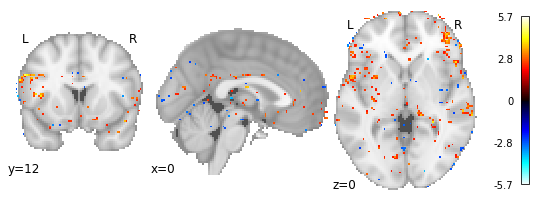

IC  IsGood Notes         stat_img  \
17  IC_18   False  Line  _zstat18.nii.gz   

                                         path_to_stat  
17  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

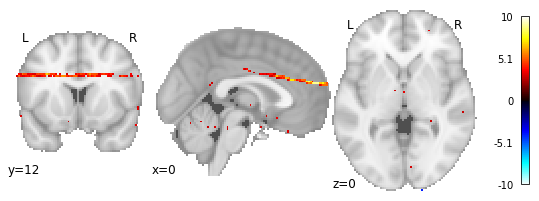

IC  IsGood Notes         stat_img  \
18  IC_19    True   NaN  _zstat19.nii.gz   

                                         path_to_stat  
18  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

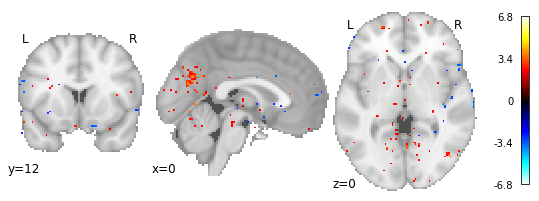

IC  IsGood Notes         stat_img  \
19  IC_20    True   NaN  _zstat20.nii.gz   

                                         path_to_stat  
19  Post-Melodic/Exp2/Melodic_Smth-2_Out_task-Card...

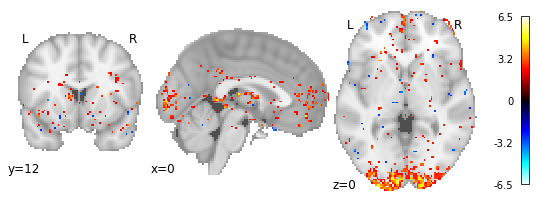

In [11]:
statimages=natsorted([os.path.join(root,f) for root,dirs,files in os.walk(out)
             for f in files if f.startswith("thresh_zstat")])

handclass=pd.read_csv(out+"/handclass.csv")
#Classification Strategies

handclass['stat_img']=[re.search("thresh(.*)",img).group(1) for img in statimages]
handclass['path_to_stat']=statimages

print(color.BOLD+"%s of %s "%(
    len(handclass[handclass['IsGood']==True]),
    len(statimages))+color.END+"components are good in: \n  %s Output"%(out))
for img in statimages:
    display(handclass[handclass['path_to_stat']==img])
    nilearn.plotting.plot_stat_map(img,cut_coords=[0,12,0],draw_cross=False,)
    plt.show()

## Exp 2: Rutgers Data

#### If you want an interactive map for more spatial detail name it in the cell below


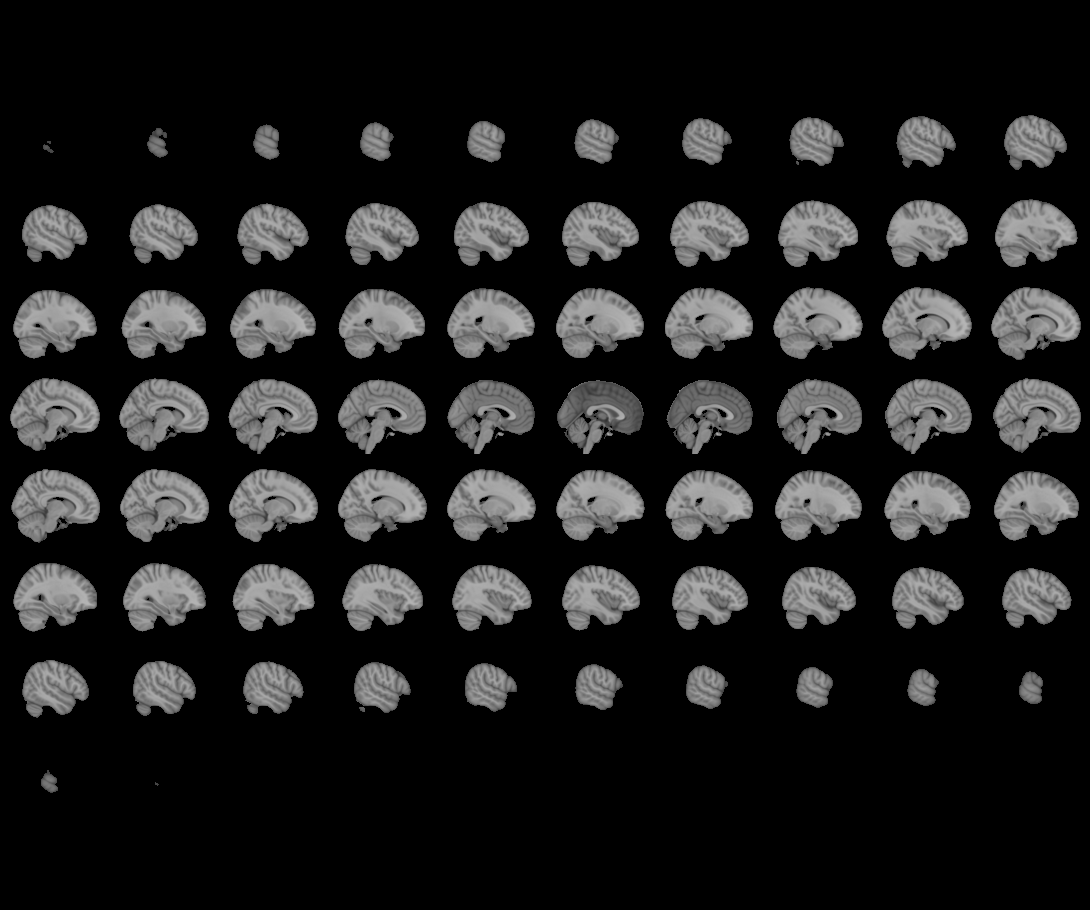
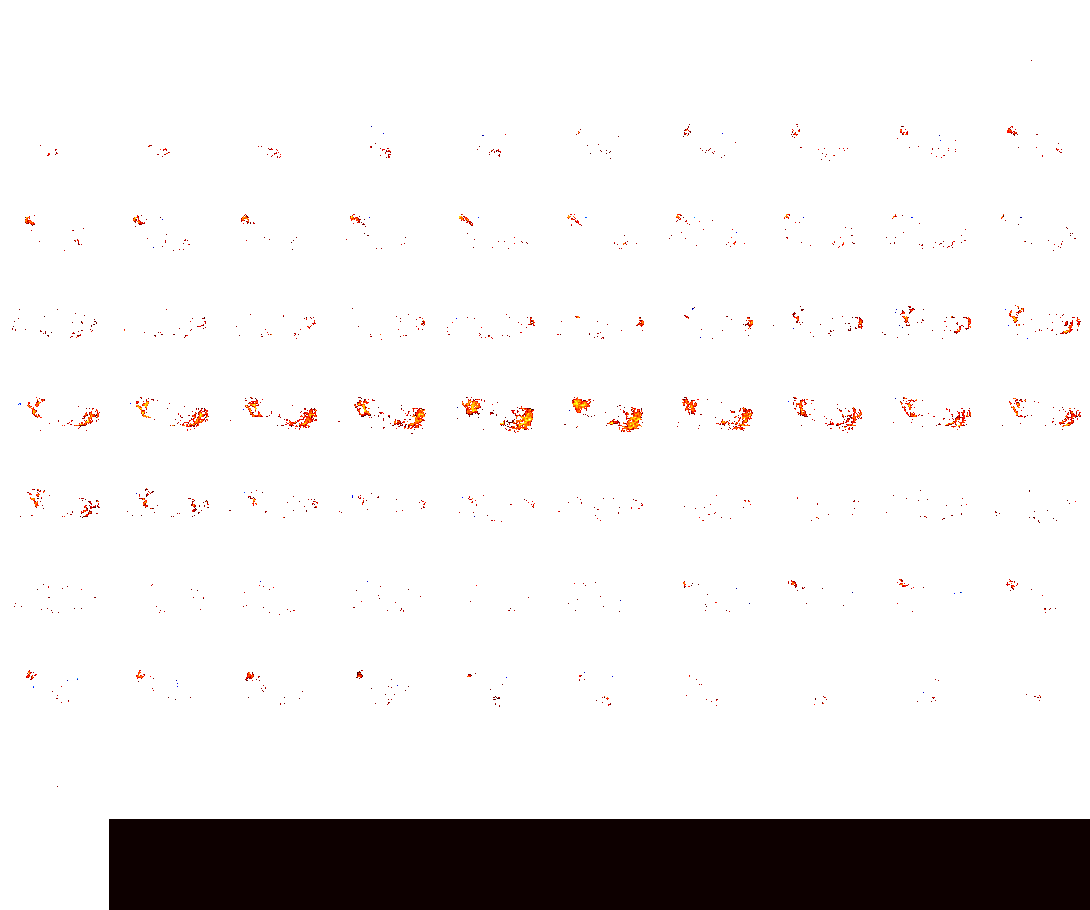

In [12]:
#Us the name from the output under IC bellow
IWantABetterLookAt='IC_16'
fname=handclass[handclass['IC']==IWantABetterLookAt].path_to_stat.values[0]
nilearn.plotting.view_img(fname,draw_cross=False,title=IWantABetterLookAt)

## Exp 2: Rutgers Data

### Make Files for PALM
- [ ] Card Task 
    - Temporal fit Only


In [13]:
data_dir=out+'/report/'
files=[data_dir+f for f in os.listdir(data_dir) if f.startswith('t') if f.endswith('.txt')]

df_list=[]
for f in natsorted(files):
    Tweight_df=pd.read_csv(f,delim_whitespace=True,
                           header=None,names=sub_data['S-R'])
    Tweight_df.reset_index(drop=True,inplace=True)
    
    Tweight_df= (Tweight_df - Tweight_df.mean())/Tweight_df.std()

    Tweight_df['IC']='IC_%02d'%(int(re.search('report/t(.*).txt',f).group(1)))
    
    Zweight_df=Tweight_df
    
    Zweight_df=Zweight_df.melt(id_vars=['IC'])
    Zweight_df[['Sub','run']] = Zweight_df.variable.str.split(expand=True)
    Zweight_df['Trial']=evs['trial_type'].values
    Zweight_df['Gain']=evs['gain'].values
    Zweight_df['Neutral']=evs['neutral'].values
    Zweight_df['Loss']=evs['loss'].values
    Zweight_df['Miss']=evs['missed_trial'].values

    Zweight_df['ev_sub']=evs['sub'].values
    df_list.append(Zweight_df.copy())
    
tmode_df=pd.concat(df_list)


In [ ]:
from pandas.api.types import CategoricalDtype
from pymer4.models import Lmer

trials = ['loss','neutral','gain']
t_type = CategoricalDtype(categories=trials, ordered=True)

display(tmode_df.head())




for IC in tmode_df['IC'].unique():
    print(IC)
    plt_df=tmode_df[(tmode_df['IC']==IC)&(tmode_df['Trial'].isin(['gain','loss','neutral']))]
    #plt_df=plt_df[plt_df['Sub']=='sub-101']
    plt_df['Linear'] = plt_df['Trial'].astype(t_type).cat.codes-1
    plt_df['Quadratic']=np.abs(plt_df['Linear'])
    
    #model = Lmer("value ~ Linear*Quadratic+(1|Sub)", data=plt_df)
    #res=model.fit()
    #display(res)

    sms.pointplot(x='Trial',y='value',hue='Sub',data=plt_df,legend=False)
    plt.show()

# Experiment 2: Rutgers Data
> Fit the Temporal Modes and Output for PALM

In [15]:
t_df

Gains    Losses         sub group     IC_01     IC_02     IC_03  \
140668 -0.067254 -0.500890  sub-996782    HC -1.534189 -1.495784 -1.885998   
140669 -0.069617 -0.499410  sub-996782    HC -1.636794 -1.588605 -1.702446   
140670 -0.071971 -0.497930  sub-996782    HC -1.722153 -1.714999 -1.721344   
140671 -0.074317 -0.496451  sub-996782    HC -1.472344 -1.553399 -1.481503   
140672 -0.076655 -0.494974  sub-996782    HC -1.420556 -1.506760 -1.363227   
...          ...       ...         ...   ...       ...       ...       ...   
141169 -0.555110 -0.200235  sub-996782    HC -2.269160 -2.086281 -2.004002   
141170 -0.562287 -0.197349  sub-996782    HC -2.249119 -2.042833 -1.979411   
141171 -0.562800 -0.194439  sub-996782    HC -2.063491 -1.919609 -1.971123   
141172 -0.558695 -0.191507  sub-996782    HC -1.704670 -1.423992 -1.427902   
141173 -0.550654 -0.188550  sub-996782    HC -1.623689 -1.367313 -1.314811   

           IC_04     IC_05     IC_06  ...     IC_11     IC_12     IC_13  \
140668 -1.285131  1.756210  1.348808  ...  0.554835 -2.518717  1.424318   
140669 -1.435770  1.665081  1.512628  ...  0.867627 -2.213521  1.610465   
140670 -1.584361  1.797169  1.713194  ...  1.417318 -1.705722  1.364389   
140671 -1.359113  1.581279  1.522870  ...  1.459386 -1.352658  1.117979   
140672 -1.383875  1.584454  1.486785  ...  1.616149 -1.003133  1.093586   
...          ...       ...       ...  ...       ...       ...       ...   
141169 -2.124431  1.842458  2.307410  ...  1.697406 -2.308386  1.986023   
141170 -2.074794  1.789514  2.281566  ...  1.724087 -2.235020  1.941599   
141171 -1.862172  1.677582  2.157137  ...  1.383058 -2.466147  1.870916   
141172 -1.449893  1.266899  1.955709  ...  1.328818 -1.781121  1.527094   
141173 -1.402792  1.228585  1.913105  ...  1.295282 -1.592308  1.401876   

           IC_14     IC_15     IC_16     IC_17     IC_18     IC_19     IC_20  
140668  0.408170  0.659224  3.243116  1.617665  2.215178  1.351744  0.251299  
140669  0.539751  0.902344  2.474481  0.542541  1.144560  1.153392  0.223696  
140670  1.031723  1.600062  1.408725 -0.416802 -0.039613  0.511616 -0.465618  
140671  0.945493  1.602410  1.131438 -0.515780 -0.383947  0.494896 -0.687054  
140672  1.112411  1.854231  0.566134 -0.948284 -0.801769  0.348038 -0.739602  
...          ...       ...       ...       ...       ...       ...       ...  
141169  1.184847  1.683978  0.736174 -0.954282 -0.038253  1.509208  0.818105  
141170  1.031393  1.760443  0.769524 -1.101115 -0.222397  1.485118  0.848782  
141171  0.565418  1.199091  1.396484 -0.494583  0.109498  0.752660 -0.106728  
141172  0.850885  0.744595  0.360867 -0.914370 -0.608544  0.959521  0.256850  
141173  1.046818  0.848506  0.063820 -1.128043 -0.684385  1.178921  0.527505  

[506 rows x 24 columns]

In [16]:
data=[]


for IC in handclass[handclass['IsGood']==True]['IC']:       
    for sub in tmode_df['Sub'].unique():
        row=[]
        
        t_df=tmode_df[(tmode_df['IC']==IC)&
                     (tmode_df['Sub']==sub)].copy()
        
        
        mod1 = ols("value ~ Gain + Neutral+ Loss+ Miss +Gain*Neutral*Loss", data=t_df)
        res1 = mod1.fit()
        t_df=t_df[t_df['Trial'].isin(['gain','loss','neutral'])]
        
        t_df['Linear'] = t_df['Trial'].astype(t_type).cat.codes-1
        t_df['Quadratic']=np.abs(t_df['Linear'])
        
        mod2= ols("value ~ Linear+Quadratic+Linear*Quadratic",data=t_df)
        res2=mod2.fit()
        
        row.append([sub,IC,
                    res1.params['Gain'],res1.params['Neutral'],res1.params['Loss'],
                   res2.params['Linear'],res2.params['Quadratic'],res2.params['Linear:Quadratic']])
        row=np.array(row)
        data.append(row)
        
        

    reg_df=pd.DataFrame(columns=['sub','IC','Gain','Neutral','Losses','Linear','Quadratic','INT'],
                        data=np.concatenate(data))
    
    reg_df[['Gain','Neutral','Losses','Linear','Quadratic','INT']]=reg_df[
        ['Gain','Neutral','Losses','Linear','Quadratic','INT']].apply(pd.to_numeric, errors='coerce')
    
    reg_df['G-L']=reg_df['Gain']-reg_df['Losses']
    reg_df['G-N']=reg_df['Gain']-reg_df['Neutral']
    reg_df['L-N']=reg_df['Losses']-reg_df['Neutral']

    pivot_df=reg_df[['sub','IC','G-L','G-N','L-N','Linear','Quadratic','INT']]
    pivot_df=pivot_df.pivot('sub','IC')
    
    pivot_df['G-L'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_Gain-Loss_task-%s.csv'%(EXP,task),
                    index=False,header=False)
    pivot_df['G-N'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_Gain-Neutral_task-%s.csv'%(EXP,task),
                    index=False,header=False)
    pivot_df['L-N'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_Loss-Neutral_task-%s.csv'%(EXP,task),
                    index=False,header=False)
    pivot_df['Linear'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_Linear_task-%s.csv'%(EXP,task),
                    index=False,header=False)
    pivot_df['Quadratic'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_Quadratic_task-%s.csv'%(EXP,task),
                    index=False,header=False)
    pivot_df['INT'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_INT_task-%s.csv'%(EXP,task),
                    index=False,header=False)

display(t_df)
display(pivot_df)

/home/strange/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/strange/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IC          variable     value      Sub       run    Trial  Gain  \
1710  IC_20  sub-123 run-both -0.045191  sub-123  run-both     gain     1   
1711  IC_20  sub-123 run-both -0.300574  sub-123  run-both     loss     0   
1712  IC_20  sub-123 run-both -0.888619  sub-123  run-both  neutral     0   
1713  IC_20  sub-123 run-both -0.286170  sub-123  run-both  neutral     0   
1714  IC_20  sub-123 run-both -0.920955  sub-123  run-both     gain     1   
...     ...               ...       ...      ...       ...      ...   ...   
1793  IC_20  sub-123 run-both  0.667207  sub-123  run-both     gain     1   
1795  IC_20  sub-123 run-both  2.499715  sub-123  run-both     loss     0   
1796  IC_20  sub-123 run-both  1.697651  sub-123  run-both  neutral     0   
1798  IC_20  sub-123 run-both -1.949139  sub-123  run-both     gain     1   
1799  IC_20  sub-123 run-both -1.194076  sub-123  run-both     loss     0   

      Neutral  Loss  Miss   ev_sub  Linear  Quadratic  
1710        0     0     0  sub-123       1          1  
1711        0     1     0  sub-123      -1          1  
1712        1     0     0  sub-123       0          0  
1713        1     0     0  sub-123       0          0  
1714        0     0     0  sub-123       1          1  
...       ...   ...   ...      ...     ...        ...  
1793        0     0     0  sub-123       1          1  
1795        0     1     0  sub-123      -1          1  
1796        1     0     0  sub-123       0          0  
1798        0     0     0  sub-123       1          1  
1799        0     1     0  sub-123      -1          1  

[80 rows x 13 columns]

G-L                                                              \
IC          IC_01     IC_02     IC_03     IC_04     IC_05     IC_06     IC_08   
sub                                                                             
sub-101 -0.511100  0.120092  0.033455 -0.156514  0.032969 -0.186247  0.008114   
sub-104  0.443129  0.088588 -0.230671  0.249960 -0.541300 -0.110566 -0.134825   
sub-105 -0.258543 -0.278167 -0.346726 -0.067952 -0.098874 -0.036892 -0.022923   
sub-106 -0.473787  0.273826  0.101124  0.286188 -0.260636 -0.404279  0.266852   
sub-107 -0.199086 -0.034163 -0.357218 -0.120419 -0.178203 -0.279765 -0.370925   
sub-108 -0.050589 -0.302144 -0.510057  0.255577 -0.180831 -0.055738 -0.355593   
sub-109  0.068956  0.299394 -0.024637  0.448666  0.282148  0.021889  0.090997   
sub-110  0.149916 -0.402759  0.591697  0.297264 -0.046198  0.193599 -1.072480   
sub-111  0.301451  0.318466 -0.016369 -0.207002 -0.310612 -0.014739 -0.128375   
sub-112 -0.016788 -0.029025  0.075626  0.220652 -0.020552 -0.018002  0.127332   
sub-113 -0.000205 -0.299003 -0.382597 -0.215851  0.264889  0.060239  0.075640   
sub-114 -0.380875  0.052344 -0.560705 -0.276438  0.063643  0.290226 -0.391795   
sub-115  0.100953  0.040174  0.151733  0.200328  0.411788 -0.343819  0.515393   
sub-116  0.267452 -0.000634 -0.381209 -0.089652  0.120160 -0.199614  0.044916   
sub-117 -0.655038  0.117100 -0.129155 -0.004407 -0.533541 -0.387947  0.082431   
sub-118 -0.201126  0.104147  0.017504  0.395956  0.467642  0.532447 -0.116056   
sub-119 -0.006646  0.282648 -0.140213 -0.060330 -0.214707 -0.158252 -0.146311   
sub-121 -0.155935 -0.137233  0.079673  0.617773 -0.023053 -0.126152 -0.191120   
sub-122 -0.054179 -0.061345 -0.343464  0.086557 -0.042847  0.082557 -0.030525   
sub-123 -0.115005 -0.127879  0.005516  0.159271 -0.189791  0.025257  0.493813   

                                       ...       INT                      \
IC          IC_12     IC_13     IC_14  ...     IC_06     IC_08     IC_12   
sub                                    ...                                 
sub-101  0.037007  0.185312  0.073904  ... -0.046562  0.002028  0.009252   
sub-104  0.346266  0.233700  0.085212  ... -0.027641 -0.033706  0.086567   
sub-105  0.093703  0.042407 -0.283736  ... -0.009223 -0.005731  0.023426   
sub-106  0.196257 -0.248578 -0.063297  ... -0.101070  0.066713  0.049064   
sub-107 -0.055083  0.101351  0.196699  ... -0.069941 -0.092731 -0.013771   
sub-108  0.257731  0.125918 -0.037675  ... -0.013935 -0.088898  0.064433   
sub-109 -0.260261  0.166259  0.008606  ...  0.005472  0.022749 -0.065065   
sub-110  0.603598 -0.132775 -0.275772  ...  0.048400 -0.268120  0.150899   
sub-111  0.112267  0.289544 -0.166815  ... -0.003685 -0.032094  0.028067   
sub-112  0.223583  0.052508  0.097031  ... -0.004500  0.031833  0.055896   
sub-113 -0.256143  0.004532  0.021656  ...  0.015060  0.018910 -0.064036   
sub-114  0.021683  0.385449 -0.407690  ...  0.072556 -0.097949  0.005421   
sub-115 -0.128311  0.219605 -0.193585  ... -0.085955  0.128848 -0.032078   
sub-116 -0.068499  0.233723 -0.252915  ... -0.049903  0.011229 -0.017125   
sub-117  0.032537 -0.120929  0.082333  ... -0.096987  0.020608  0.008134   
sub-118 -0.395280 -0.047564 -0.484747  ...  0.133112 -0.029014 -0.098820   
sub-119  0.055186  0.183794  0.169124  ... -0.039563 -0.036578  0.013796   
sub-121  0.281821 -0.162697 -0.064685  ... -0.031538 -0.047780  0.070455   
sub-122  0.264014  0.116087  0.063113  ...  0.020639 -0.007631  0.066003   
sub-123 -0.473755 -0.171898 -0.601585  ...  0.006314  0.123453 -0.118439   

                                                                               
IC          IC_13     IC_14     IC_15     IC_16     IC_17     IC_19     IC_20  
sub                                                                            
sub-101  0.046328  0.018476 -0.131586 -0.109092 -0.036375  0.026503 -0.092328  
sub-104  0.058425  0.021303 -0.039586 -0.018029 -0.012398 -0.083334 -0.086980  
s

# Exp2: Rutgers Data
> Run Temporal Fits through PALM|

In [17]:

infiles=[os.path.join(root,f) for root,dirs,files in os.walk('Post-Melodic/Code/PALM/Exp2') for f in files  if 'Fit_T_beta' in f]
for Input in infiles:
    contrast=re.search('beta_(.*)_task',Input).group(1)
    Output='Post-Melodic/Code/PALM/Exp2/Results/%s'%(contrast)
    !./palm-alpha118/palm -i $Input -o $Output -quiet


             ___         ___                         ___
            /  /\       /  /\                       /__/\
           /  /::\     /  /::\                     |  |::\
          /  /:/\:\   /  /:/\:\    ___     ___     |  |:|:\
         /  /:/~/:/  /  /:/~/::\  /__/\   /  /\  __|__|:|\:\
        /__/:/ /:/  /__/:/ /:/\:\ \  \:\ /  /:/ /__/::::| \:\
        \  \:\/:/   \  \:\/:/__\/  \  \:\  /:/  \  \:\~~\__\/
         \  \::/     \  \::/        \  \:\/:/    \  \:\
          \  \:\      \  \:\         \  \::/      \  \:\
           \  \:\      \  \:\         \__\/        \  \:\
            \__\/       \__\/                       \__\/

                 Permutation Analysis of Linear Models
Running PALM alpha118
 using Octave 5.2.0 with the following options:
-i Post-Melodic/Code/PALM/Exp2/Fit_T_beta_Linear_task-INT.csv
-o Post-Melodic/Code/PALM/Exp2/Results/Linear
-quiet
Found FSL in /usr/local/fsl
Reading input 1/1: Post-Melodic/Code/PALM/Exp2/Fit_T_beta_Linear_task-INT.csv
Readi

Reading input 1/1: Post-Melodic/Code/PALM/Exp2/Fit_T_beta_Linear_task-Quadratic.csv
Reading design matrix and contrasts.
Elapsed time parsing inputs: ~ 0.125729 seconds.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Elapsed time with permutations: ~ 44.8166 seconds.
Computing p-values.
Saving p-values (uncorrected, and corrected within modality and within contrast).
Elapsed time generating and saving results: ~ 0.177772 seconds.
Overall elapsed time: ~ 45.1201 seconds.
PALM finished at 02-Sep-2021 15:26:11.
             ___         ___                         ___
            /  /\       /  /\                       /__/\
           /  /::\     /  /::\                     |  |::\
          /  /:/\:\   /  /:/\:\    ___     ___     |  |:|:\
         /  /:/~/:/  /  /:/~/::\  /__/\   /

Running PALM alpha118
 using Octave 5.2.0 with the following options:
-i Post-Melodic/Code/PALM/Exp2/Fit_T_beta_INT_task-Card.csv
-o Post-Melodic/Code/PALM/Exp2/Results/INT
-quiet
Found FSL in /usr/local/fsl
Reading input 1/1: Post-Melodic/Code/PALM/Exp2/Fit_T_beta_INT_task-Card.csv
Reading design matrix and contrasts.
Elapsed time parsing inputs: ~ 0.144147 seconds.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Elapsed time with permutations: ~ 39.5119 seconds.
Computing p-values.
Saving p-values (uncorrected, and corrected within modality and within contrast).
Elapsed time generating and saving results: ~ 0.168828 seconds.
Overall elapsed time: ~ 39.8248 seconds.
PALM finished at 02-Sep-2021 15:28:23.
             ___         ___                         ___
            /  /\   

Building null distribution.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Elapsed time with permutations: ~ 39.866 seconds.
Computing p-values.
Saving p-values (uncorrected, and corrected within modality and within contrast).
Elapsed time generating and saving results: ~ 0.168737 seconds.
Overall elapsed time: ~ 40.1729 seconds.
PALM finished at 02-Sep-2021 15:29:45.
             ___         ___                         ___
            /  /\       /  /\                       /__/\
           /  /::\     /  /::\                     |  |::\
          /  /:/\:\   /  /:/\:\    ___     ___     |  |:|:\
         /  /:/~/:/  /  /:/~/::\  /__/\   /  /\  __|__|:|\:\
        /__/:/ /:/  /__/:/ /:/\:\ \  \:\ /  /:/ /__/::::| \:\
        \  \:\/:/   \  \:\/:/__\/  \  \:\  /:/  \  \:\~~\__\/
         \  \::/     \  \::/        \  \:\/:/    \  \:\
          \  \:\      \  \:\         \  \::/      \  \:\
           \  \:

Found FSL in /usr/local/fsl
Reading input 1/1: Post-Melodic/Code/PALM/Exp2/Fit_T_beta_Loss-Neutral_task-Card.csv
Reading design matrix and contrasts.
Elapsed time parsing inputs: ~ 0.133495 seconds.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Elapsed time with permutations: ~ 40.2464 seconds.
Computing p-values.
Saving p-values (uncorrected, and corrected within modality and within contrast).
Elapsed time generating and saving results: ~ 0.175822 seconds.
Overall elapsed time: ~ 40.5558 seconds.
PALM finished at 02-Sep-2021 15:31:48.
             ___         ___                         ___
            /  /\       /  /\                       /__/\
           /  /::\     /  /::\                     |  |::\
          /  /:/\:\   /  /:/\:\    ___     ___     |  |:|:\
         /  /:

Running PALM alpha118
 using Octave 5.2.0 with the following options:
-i Post-Melodic/Code/PALM/Exp2/Fit_T_beta_Loss-Neutral_task-INT.csv
-o Post-Melodic/Code/PALM/Exp2/Results/Loss-Neutral
-quiet
Found FSL in /usr/local/fsl
Reading input 1/1: Post-Melodic/Code/PALM/Exp2/Fit_T_beta_Loss-Neutral_task-INT.csv
Reading design matrix and contrasts.
Elapsed time parsing inputs: ~ 0.126039 seconds.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Elapsed time with permutations: ~ 42.2354 seconds.
Computing p-values.
Saving p-values (uncorrected, and corrected within modality and within contrast).
Elapsed time generating and saving results: ~ 0.159404 seconds.
Overall elapsed time: ~ 42.5209 seconds.
PALM finished at 02-Sep-2021 15:33:52.
             ___         ___                        

Building null distribution.
Number of possible sign-flips is 1.04858e+06 = 2^20.
Generating 10000 shufflings (sign-flips only).
Building null distribution.
Elapsed time with permutations: ~ 37.3215 seconds.
Computing p-values.
Saving p-values (uncorrected, and corrected within modality and within contrast).
Elapsed time generating and saving results: ~ 0.16181 seconds.
Overall elapsed time: ~ 37.6312 seconds.
PALM finished at 02-Sep-2021 15:35:12.
             ___         ___                         ___
            /  /\       /  /\                       /__/\
           /  /::\     /  /::\                     |  |::\
          /  /:/\:\   /  /:/\:\    ___     ___     |  |:|:\
         /  /:/~/:/  /  /:/~/::\  /__/\   /  /\  __|__|:|\:\
        /__/:/ /:/  /__/:/ /:/\:\ \  \:\ /  /:/ /__/::::| \:\
        \  \:\/:/   \  \:\/:/__\/  \  \:\  /:/  \  \:\~~\__\/
         \  \::/     \  \::/        \  \:\/:/    \  \:\
          \  \:\      \  \:\         \  \::/      \  \:\
           \  \:

### Exp2: Rutgers Data
> prepare Palm Statistics

In [18]:
palm_list=[]
palm_df=[]
for task in ['Gain-Loss','Gain-Neutral','Loss-Neutral','Linear','Quadratic','INT']:
    #hand_class=hand_class[hand_class['Task']==task].copy()
    names=[IC for IC in handclass[handclass['IsGood']==True]['IC']]
    Output='Post-Melodic/Code/PALM/Exp2/Results/'
    for f in [Output+f for f in os.listdir(Output) if (f.startswith(task))&('tstat' in f)]:
        t=pd.read_csv(f,names=names)
        t['file']=re.search('tstat(.*)',f).group(0)
        t['Task']=task
        palm_df.append(t)
palm_df=pd.concat(palm_df)
palm_list.append(palm_df.melt(id_vars=['file','Task'],var_name='IC',value_name='stat'))
palm_df=pd.concat(palm_list)

### Exp2: Rutgers Data
> Prepare subject modes and motion metrics

In [19]:
#Quality Control
qc_df=pd.read_csv(out+'/group_bold.tsv',sep='\t')
qc_df[['sub','task','run','bold']]=qc_df.bids_name.str.split('_',expand=True)
qc_df['sub_run']=["%s %s"%(x,y) for x, y in zip(qc_df['sub'], qc_df['run'])]
qc_df=qc_df.groupby(by='sub').mean().reset_index()

smodes_df=pd.read_csv(out+'/melodic_Smodes',delim_whitespace=True,header=None,
                      names=['s_%02d'%(num+1) for num in range(
                          len(tmode_df['IC'].unique()))])

smodes_df = smodes_df.assign(sub=subs, run=runs, sub_run=sr)


qc_df=qc_df[qc_df['sub'].isin(subs)]
p_df=pd.merge(qc_df,smodes_df,on='sub')

### Exp2: Rutgers Data
> Quick Display of Results

In [20]:
palm_df[(palm_df['file'].str.contains('uncp'))&(palm_df['stat']<0.05)]

file          Task     IC    stat
5    tstat_uncp_c2.csv     Gain-Loss  IC_01  0.0383
28   tstat_uncp_c1.csv     Quadratic  IC_01  0.0241
40   tstat_uncp_c1.csv     Gain-Loss  IC_02  0.0436
81   tstat_uncp_c2.csv  Gain-Neutral  IC_03  0.0338
93   tstat_uncp_c2.csv        Linear  IC_03  0.0383
103  tstat_uncp_c1.csv           INT  IC_03  0.0277
126  tstat_uncp_c1.csv        Linear  IC_04  0.0436
160  tstat_uncp_c1.csv  Loss-Neutral  IC_05  0.0130
196  tstat_uncp_c1.csv  Loss-Neutral  IC_06  0.0075
292  tstat_uncp_c1.csv     Gain-Loss  IC_13  0.0391
296  tstat_uncp_c1.csv  Gain-Neutral  IC_13  0.0461
306  tstat_uncp_c1.csv        Linear  IC_13  0.0391
329  tstat_uncp_c2.csv     Gain-Loss  IC_14  0.0287
333  tstat_uncp_c2.csv  Gain-Neutral  IC_14  0.0412
345  tstat_uncp_c2.csv        Linear  IC_14  0.0287
352  tstat_uncp_c1.csv     Quadratic  IC_14  0.0122
355  tstat_uncp_c1.csv           INT  IC_14  0.0251
365  tstat_uncp_c2.csv     Gain-Loss  IC_15  0.0346
376  tstat_uncp_c1.csv  Loss-Neutral  IC_15  0.0478
381  tstat_uncp_c2.csv        Linear  IC_15  0.0346
404  tstat_uncp_c1.csv  Gain-Neutral  IC_16  0.0226
420  tstat_uncp_c2.csv     Quadratic  IC_16  0.0354
426  tstat_uncp_c2.csv           INT  IC_16  0.0409
508  tstat_uncp_c1.csv     Gain-Loss  IC_20  0.0346
521  tstat_uncp_c2.csv  Loss-Neutral  IC_20  0.0380
522  tstat_uncp_c1.csv        Linear  IC_20  0.0346

In [5]:
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sms

for IC in reg_df['IC'].unique():
    print(IC)
    icn=re.search('IC_(.*)',IC).group(1)
    plt_df=reg_df[(reg_df['IC']==IC)].copy()
    plt_df=plt_df.melt(id_vars=['sub','IC'])

    plt_df=plt_df[plt_df['variable'].isin(['Gain','Neutral','Losses'])]
    G_Lstats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Gain-Loss')].sort_values(by='file')
    G_Nstats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Gain-Neutral')].sort_values(by='file')
    L_Nstats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Loss-Neutral')].sort_values(by='file')
    Lin_stats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Linear')].sort_values(by='file')
    Quad_stats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Quadratic')].sort_values(by='file')
    
    #md = smf.mixedlm("value ~ Linear+Quadratic", t_DF, groups=t_DF['sub']).fit()
    #display(md.summary())
    r,p=stats.spearmanr(p_df['s_%s'%(icn)],p_df['fd_mean'])
    title4='Correlation With Motion r:%04f p:%04f' %(r,p)
    
    display(multi_table([Lin_stats,Quad_stats,G_Lstats,G_Nstats,L_Nstats]))
    
    img=handclass[handclass['IC']==IC]['path_to_stat'].values[0]
    nilearn.plotting.plot_stat_map(img,cut_coords=[0,12,0],draw_cross=False)
    plt.show()

    fig,((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
    ax1.set_title("Swarm Temporal Fit")
    ax2.set_title("Point Temporal Fit")
    ax4.set_title(title4)

    sms.swarmplot(x='variable',y='value',data=plt_df,ax=ax1,
                  order=['Losses','Neutral','Gain'])
    sms.pointplot(x='variable',y='value',hue='sub',data=plt_df,ax=ax2
                  ,
                 order=['Losses','Neutral','Gain'])
    #ax2.get_legend().remove()
    #sms.barplot(x='groups',y='%s'%(IC),data=plt_df,ax=ax3)
    sms.regplot(x='fd_mean',y='s_%s'%(icn),data=p_df,ax=ax4)
    
    plt.show()


NameError: name 'reg_df' is not defined

# Post Melodic _Experiment 3
- [ ] Organize TICA Output
- [ ] Hand Classify Components
- [ ] Find Components that Track task
- [ ] Find Components that Track Individual Differences

## Exp 3: (NARPS)
### Organize Output

In [109]:
EXP="Exp3" #Choose "Exp1" HCP Data "Exp2" Rutgers Data  or "Exp3" NARPS Data
tica_output=[os.path.join(root,d) for root,dirs,files in os.walk("Post-Melodic/"+EXP)
             for d in dirs if ((d.endswith(".ica"))&('filtered-4'in d))]
out=tica_output[0]
#task=[re.search("task-(.*?)_",output).group(1) for output in tica_output][0]

reg_list=[]
results=tica_output[0]# Experiment 1 has 2 tasks to deal with.
print(results)
task='MGT'
hand_class=pd.read_csv(out+'/handclass.csv')

#Get subject number in order from tica logfiles___________________________________
log_file = open(results+'/log.txt', 'r') 
Lines = log_file.readlines()
log_file.close()
subs=[]
for line in Lines:
    if line.startswith("Excluding voxels with constant value"):
        break
    elif line.startswith("Reading data file"):
        subs.append('sub-'+re.search('/sub-(.*)/',line).group(1))


sub_data=[]
for sub in subs:
    sub_ev=[f for f in os.listdir("Pre-Melodic/"+EXP+"/bids/%s/func"%(sub)) if f.endswith("events.tsv")]
    R1=len(sub_ev)>=1
    R2=len(sub_ev)>=2
    R3=len(sub_ev)>=3
    R4=len(sub_ev)>=4                               
    row=[sub,R1,R2,R3,R4]
    sub_data.append(row)
sub_data=pd.DataFrame(data=sub_data,columns=['Subject','Run1','Run2','Run3','Run4'])
display(sub_data)

evs=[]
listoffiles=[os.path.join(d, x)
            for d, dirs, files in os.walk('Pre-Melodic/%s'%(EXP))
            for x in files if x.endswith("events.tsv")]

for sub in sub_data['Subject']:
    ts=[]
    res = [i for i in listoffiles if sub in i]
    for f in res:
        t=pd.read_csv(f,sep='\t')
        t['sub']=sub
        t['run']=re.search('run-(.*?)_',f).group(1)
        ts.append(t)
    ts=pd.concat(ts)
    ts=ts.sort_values(by=['gain','loss'])
    ts['gain']=(ts.gain - ts.gain.mean())/ts.gain.std(ddof=0)
    ts['loss']=(ts.loss - ts.loss.mean())/ts.loss.std(ddof=0)
    evs.append(ts)
evs=pd.concat(evs).reset_index()
display(evs)

Post-Melodic/Exp3/Melodic_Out_filtered-4run_20.ica


Subject  Run1  Run2  Run3  Run4
0   sub-001  True  True  True  True
1   sub-002  True  True  True  True
2   sub-003  True  True  True  True
3   sub-006  True  True  True  True
4   sub-008  True  True  True  True
..      ...   ...   ...   ...   ...
80  sub-119  True  True  True  True
81  sub-120  True  True  True  True
82  sub-121  True  True  True  True
83  sub-123  True  True  True  True
84  sub-124  True  True  True  True

[85 rows x 5 columns]

index    onset  duration      gain      loss     RT  \
0          4   33.429         4 -1.626978 -1.626978  1.456   
1         29  212.235         4 -1.626978 -1.410048  1.248   
2          8   65.838         4 -1.626978 -1.193118  2.287   
3         17  123.531         4 -1.626978 -0.976187  1.351   
4         42  294.733         4 -1.626978 -0.759257  1.663   
...      ...      ...       ...       ...       ...    ...   
21755     47  330.832         4  1.626978  0.759257  2.264   
21756     39  270.422         4  1.626978  0.976187  1.440   
21757     12   80.528         4  1.626978  1.193118  2.367   
21758     14  108.131         4  1.626978  1.410048  1.750   
21759     34  234.231         4  1.626978  1.626978  1.134   

      participant_response      sub run  
0            weakly_accept  sub-001  03  
1            weakly_accept  sub-001  04  
2            weakly_accept  sub-001  01  
3            weakly_accept  sub-001  03  
4            weakly_accept  sub-001  03  
...                    ...      ...  ..  
21755        weakly_accept  sub-124  03  
21756        weakly_accept  sub-124  03  
21757        weakly_reject  sub-124  01  
21758        weakly_reject  sub-124  02  
21759        weakly_reject  sub-124  03  

[21760 rows x 9 columns]

## Exp 3: (NARPS)
### Review Noise Components

20 Signal Components
 out of 20 total


IC  IsGood  Notes        stat_img  \
0  IC_01    True    NaN  _zstat1.nii.gz   

                                        path_to_stat  
0  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

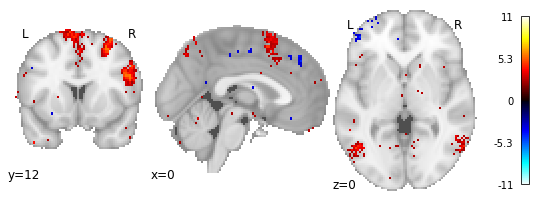

IC  IsGood  Notes        stat_img  \
1  IC_02    True    NaN  _zstat2.nii.gz   

                                        path_to_stat  
1  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

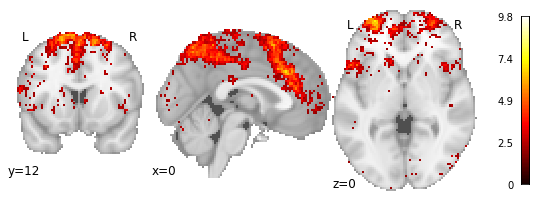

IC  IsGood  Notes        stat_img  \
2  IC_03    True    NaN  _zstat3.nii.gz   

                                        path_to_stat  
2  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

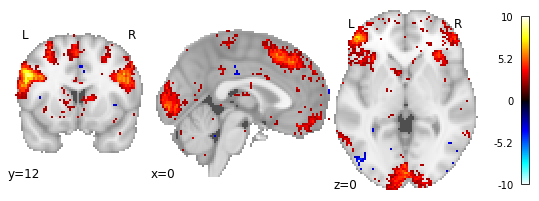

IC  IsGood  Notes        stat_img  \
3  IC_04    True    NaN  _zstat4.nii.gz   

                                        path_to_stat  
3  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

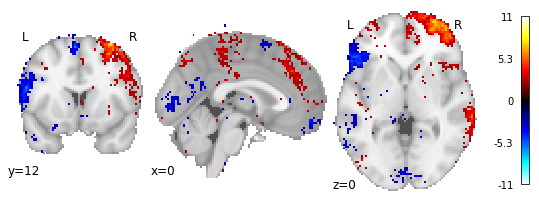

IC  IsGood  Notes        stat_img  \
4  IC_05    True    NaN  _zstat5.nii.gz   

                                        path_to_stat  
4  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

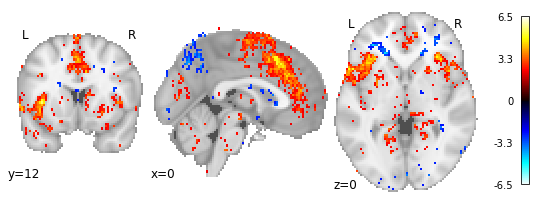

IC  IsGood  Notes        stat_img  \
5  IC_06    True    NaN  _zstat6.nii.gz   

                                        path_to_stat  
5  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

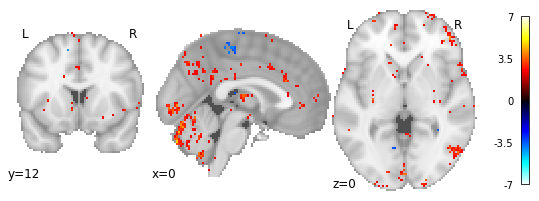

IC  IsGood  Notes        stat_img  \
6  IC_07    True    NaN  _zstat7.nii.gz   

                                        path_to_stat  
6  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

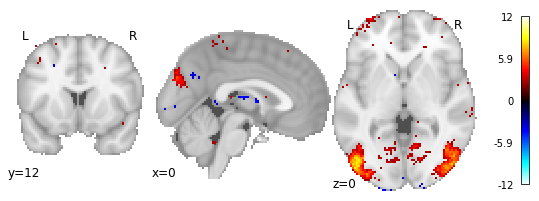

IC  IsGood  Notes        stat_img  \
7  IC_08    True    NaN  _zstat8.nii.gz   

                                        path_to_stat  
7  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

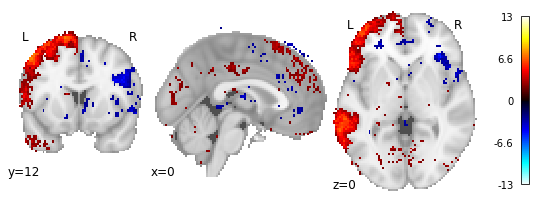

IC  IsGood  Notes        stat_img  \
8  IC_09    True    NaN  _zstat9.nii.gz   

                                        path_to_stat  
8  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

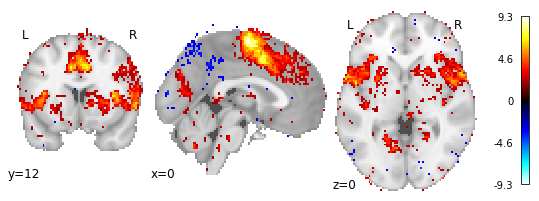

IC  IsGood  Notes         stat_img  \
9  IC_10    True    NaN  _zstat10.nii.gz   

                                        path_to_stat  
9  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

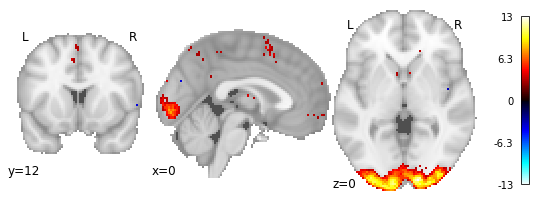

IC  IsGood  Notes         stat_img  \
10  IC_11    True    NaN  _zstat11.nii.gz   

                                         path_to_stat  
10  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

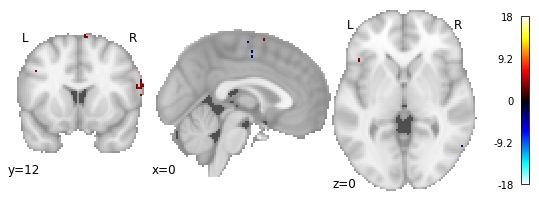

IC  IsGood  Notes         stat_img  \
11  IC_12    True    NaN  _zstat12.nii.gz   

                                         path_to_stat  
11  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

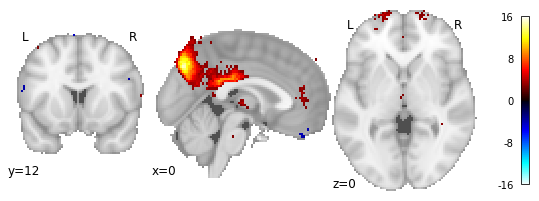

IC  IsGood  Notes         stat_img  \
12  IC_13    True    NaN  _zstat13.nii.gz   

                                         path_to_stat  
12  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

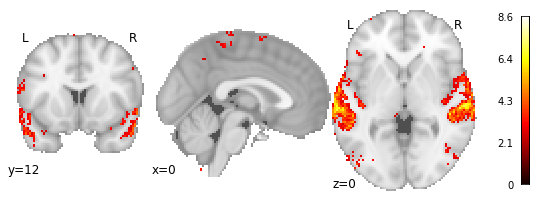

IC  IsGood  Notes         stat_img  \
13  IC_14    True    NaN  _zstat14.nii.gz   

                                         path_to_stat  
13  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

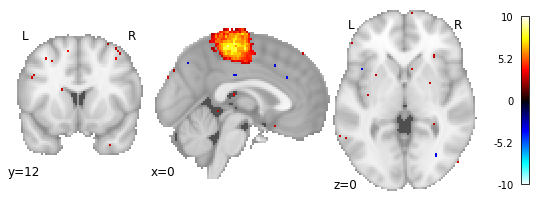

IC  IsGood  Notes         stat_img  \
14  IC_15    True    NaN  _zstat15.nii.gz   

                                         path_to_stat  
14  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

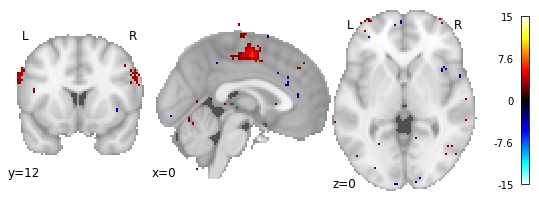

IC  IsGood  Notes         stat_img  \
15  IC_16    True    NaN  _zstat16.nii.gz   

                                         path_to_stat  
15  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

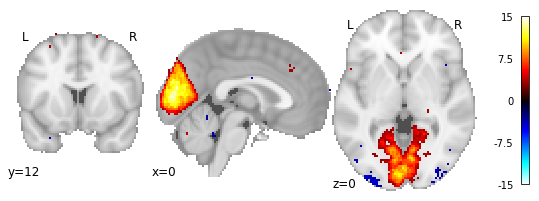

IC  IsGood  Notes         stat_img  \
16  IC_17    True    NaN  _zstat17.nii.gz   

                                         path_to_stat  
16  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

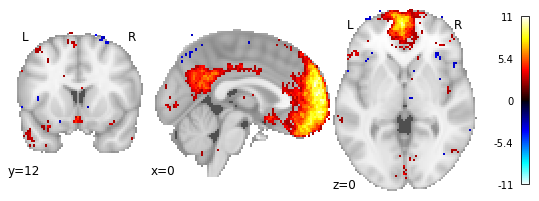

IC  IsGood  Notes         stat_img  \
17  IC_18    True    NaN  _zstat18.nii.gz   

                                         path_to_stat  
17  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

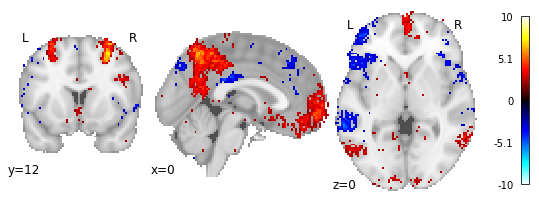

IC  IsGood  Notes         stat_img  \
18  IC_19    True    NaN  _zstat19.nii.gz   

                                         path_to_stat  
18  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

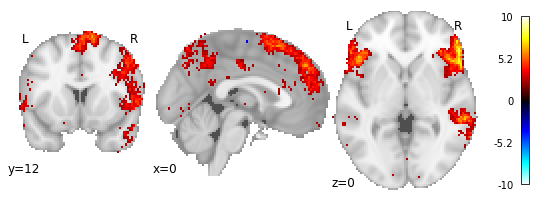

IC  IsGood  Notes         stat_img  \
19  IC_20    True    NaN  _zstat20.nii.gz   

                                         path_to_stat  
19  Post-Melodic/Exp3/Melodic_Out_filtered-4run_20...

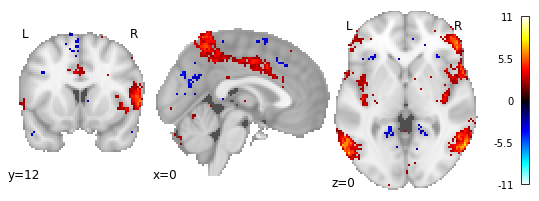

In [110]:
import nilearn
statimages=natsorted([os.path.join(root,f) for root,dirs,files in os.walk(out)
             for f in files if f.startswith("thresh_zstat")])

handclass=pd.read_csv(out+"/handclass.csv")
handclass['stat_img']=[re.search("thresh(.*)",img).group(1) for img in statimages]
handclass['path_to_stat']=statimages


good, total= len(handclass[handclass['IsGood']==True]),len(statimages)
print(color.BOLD+"%s Signal Components"%(good)+color.END+"\n out of %s total"%(total))

for img in statimages:
    display(handclass[handclass['path_to_stat']==img])
    nilearn.plotting.plot_stat_map(img,cut_coords=[0,12,0],draw_cross=False,)
    plt.show()

In [111]:
#Make PALM FILES
from scipy.stats import zscore
from statsmodels.formula.api import ols,mixedlm,gls
from statsmodels.stats.anova import anova_lm
import statsmodels
from natsort import natsorted

files=natsorted([out+'/report/'+f for f in os.listdir(out+'/report/') if f.startswith('t') if f.endswith('.txt')])

    
#Get and fit Tmodes#########################################
############################################################
#1 Get design files
design_df=evs
#display(design_df.head())

#Get temporal Modes########################################
###########################################################
#i.) Get list of tmode files from report
files=natsorted([out+'/report/'+f for f in os.listdir(out+'/report/') if f.startswith('t') if f.endswith('.txt')])


#iii.) Add columns to the tmode file that match up to the design
for f in files:

    Tweight_df=pd.read_csv(f,delim_whitespace=True,
                           header=None,names=subs)
    Tweight_df.reset_index(drop=True,inplace=True)

    Zweight_df=(Tweight_df - Tweight_df.mean())/Tweight_df.std() #Zscore the tmodes so all on same scale

    evs['IC_%02d'%(int(
        re.search('report/t(.*).txt',f).group(1)))]=Zweight_df.melt()['value']
        
tmode_df=evs 
tmode_df.to_csv('Tmodes-Unfit_task-%s.csv'%(task))#,header=False,index=False)

display(tmode_df.head())

index    onset  duration      gain      loss     RT participant_response  \
0      4   33.429         4 -1.626978 -1.626978  1.456        weakly_accept   
1     29  212.235         4 -1.626978 -1.410048  1.248        weakly_accept   
2      8   65.838         4 -1.626978 -1.193118  2.287        weakly_accept   
3     17  123.531         4 -1.626978 -0.976187  1.351        weakly_accept   
4     42  294.733         4 -1.626978 -0.759257  1.663        weakly_accept   

       sub run     IC_01  ...     IC_11     IC_12     IC_13     IC_14  \
0  sub-001  03 -0.445313  ... -0.475739 -0.117694 -0.012825  0.157975   
1  sub-001  04  0.069112  ... -2.033710 -0.203647 -0.593230  0.332558   
2  sub-001  01  0.273937  ... -0.135791  0.328876  0.492196  0.295096   
3  sub-001  03  1.153252  ...  0.320945 -0.596617  1.710850  0.437255   
4  sub-001  03 -0.010630  ...  0.943046  1.215323 -0.886282  0.527413   

      IC_15     IC_16     IC_17     IC_18     IC_19     IC_20  
0 -0.062348  0.150097  0.161423 -0.132028 -0.521564  0.264585  
1  0.289339  1.840115  0.082012 -1.010713 -0.868738  0.852725  
2  0.494464 -1.633094  0.180635 -0.061636 -0.773069 -2.035005  
3  1.260988  1.897110  0.450537  0.246329  1.065308  1.497871  
4 -0.852621  1.019249 -0.492783 -0.809973  0.354771 -1.444987  

[5 rows x 29 columns]

In [112]:
from pandas.api.types import CategoricalDtype

trials = ['strongly_reject','weakly_reject','weakly_accept','strongly_accept']
t_type = CategoricalDtype(categories=trials, ordered=True)

tmode_df['Linear'] = tmode_df['participant_response'].astype(t_type).cat.codes-1.5
tmode_df['Quadratic']=np.abs(tmode_df['Linear'])
tmode_df.groupby(by='participant_response').mean()

index       onset  duration      gain      loss  \
participant_response                                                        
NoResp                36.357724  256.462764       4.0  0.069665  0.198412   
strongly_accept       31.400641  221.884653       4.0  0.597073 -0.560884   
strongly_reject       31.759127  224.436558       4.0 -0.702760  0.602726   
weakly_accept         31.391778  221.971737       4.0  0.149200 -0.076408   
weakly_reject         31.283236  221.111970       4.0 -0.288475  0.273419   

                            RT     IC_01     IC_02     IC_03     IC_04  ...  \
participant_response                                                    ...   
NoResp                0.000000  0.163621  0.010067  0.066940  0.178773  ...   
strongly_accept       1.419883 -0.017952 -0.001915 -0.016200  0.008554  ...   
strongly_reject       1.479024  0.000770  0.004456 -0.007983 -0.015841  ...   
weakly_accept         1.912654  0.010981  0.000080  0.023503 -0.005322  ...   
weakly_reject         1.875594  0.015456 -0.003257  0.013547  0.007285  ...   

                         IC_13     IC_14     IC_15     IC_16     IC_17  \
participant_response                                                     
NoResp               -0.051755  0.122674 -0.163330  0.063641  0.019981   
strongly_accept      -0.020787  0.001465  0.006918 -0.022087  0.012501   
strongly_reject       0.026158 -0.030393  0.033794  0.012541 -0.014694   
weakly_accept         0.008342  0.011209 -0.048780  0.012546 -0.000568   
weakly_reject        -0.006422  0.024877 -0.001457  0.007505 -0.002411   

                         IC_18     IC_19     IC_20  Linear  Quadratic  
participant_response                                                   
NoResp               -0.029294 -0.115323  0.106122    -2.5        2.5  
strongly_accept       0.002402  0.001365  0.012268     1.5        1.5  
strongly_reject      -0.024165 -0.010249 -0.008772    -1.5        1.5  
weakly_accept         0.001906  0.012376 -0.010443     0.5        0.5  
weakly_reject         0.029440  0.001771 -0.001981    -0.5        0.5  

[5 rows x 28 columns]

Gain


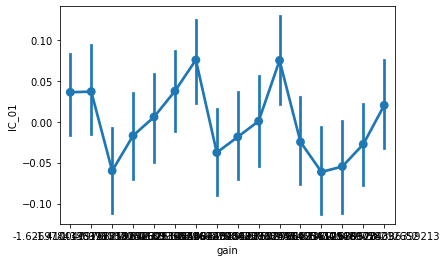

Loss


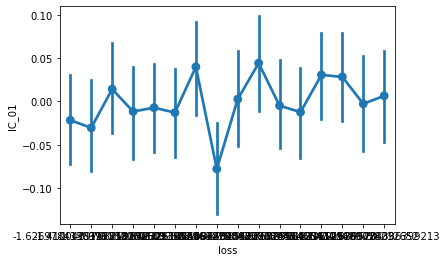

EV


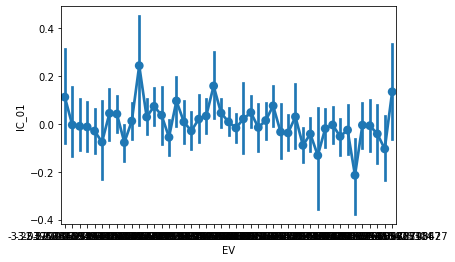

Accept


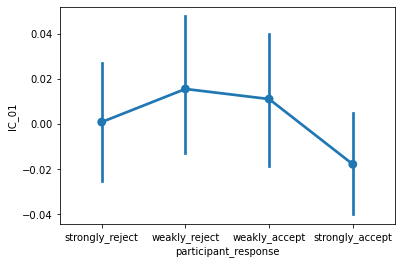

Gain


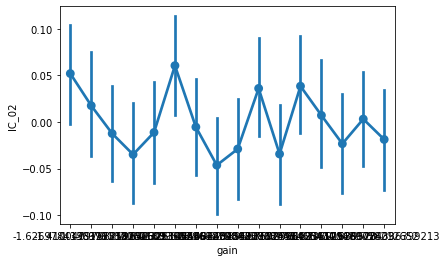

Loss


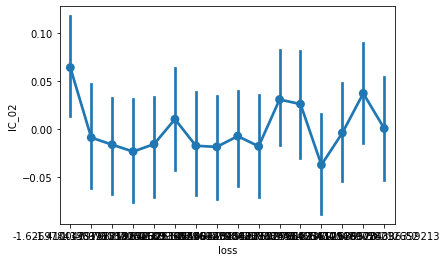

EV


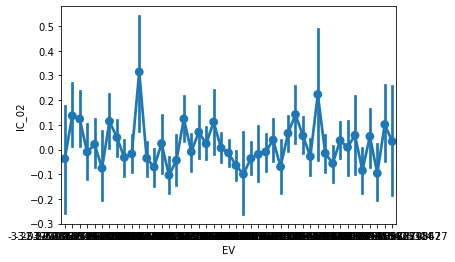

Accept


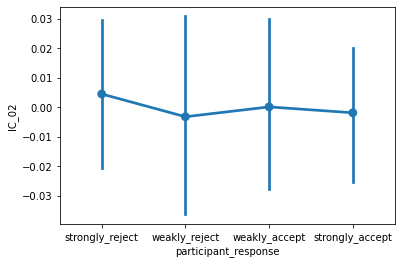

Gain


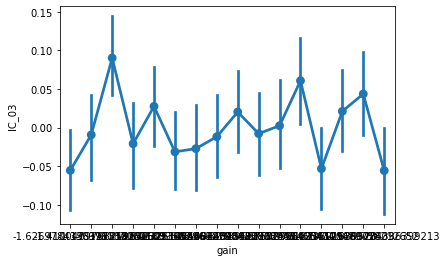

Loss


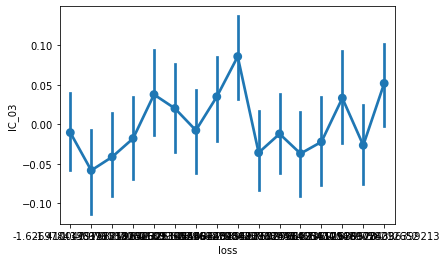

EV


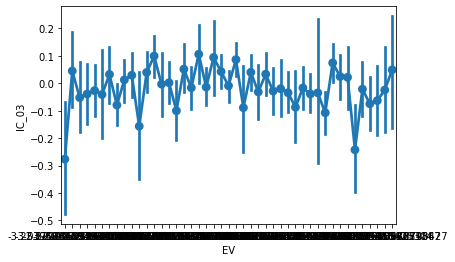

Accept


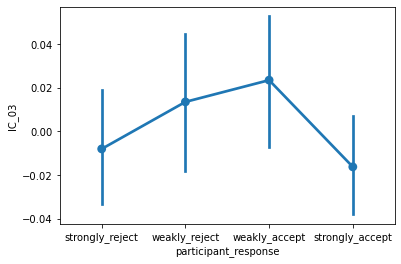

Gain


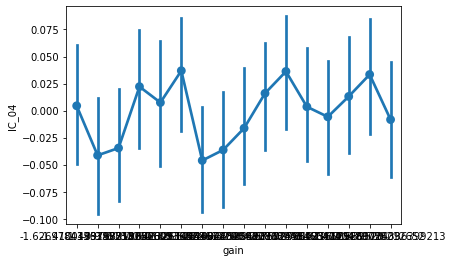

Loss


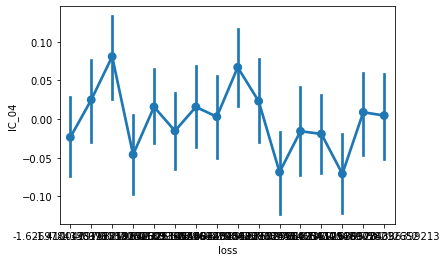

EV


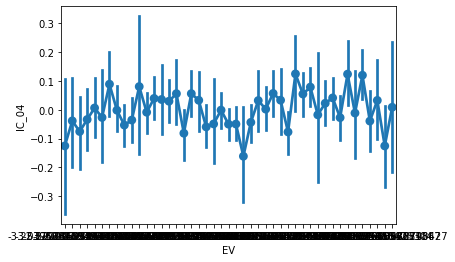

Accept


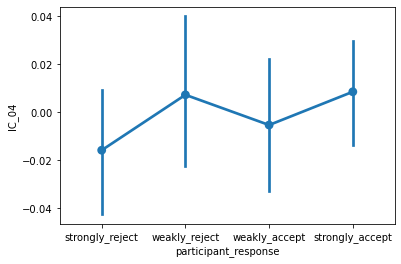

Gain


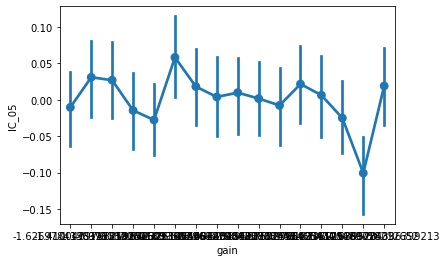

Loss


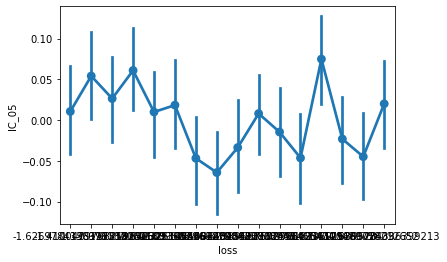

EV


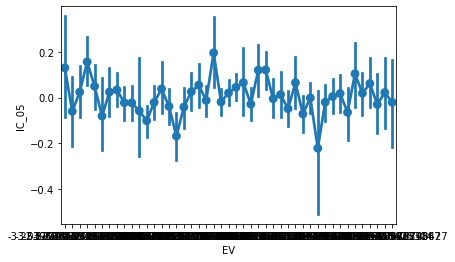

Accept


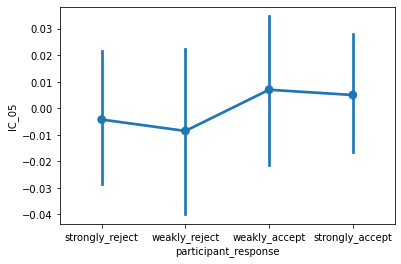

Gain


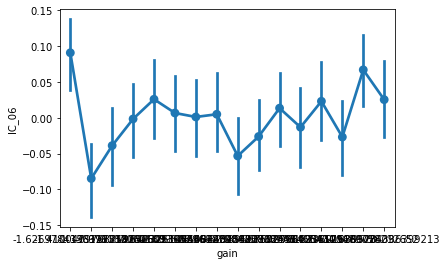

Loss


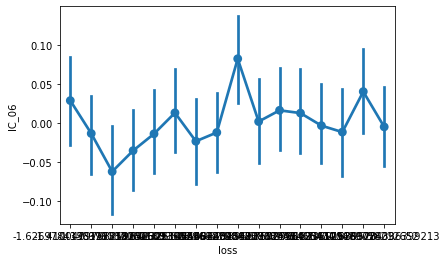

EV


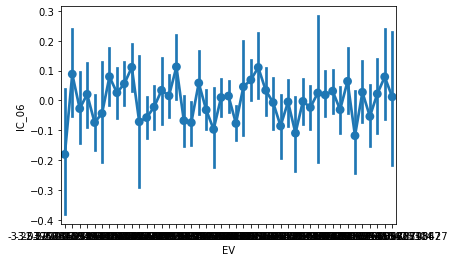

Accept


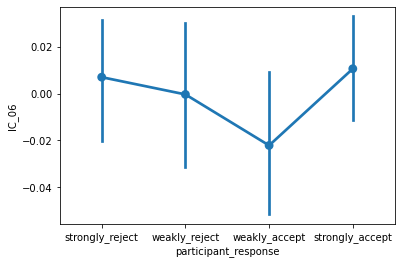

Gain


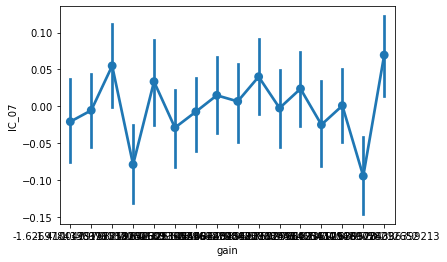

Loss


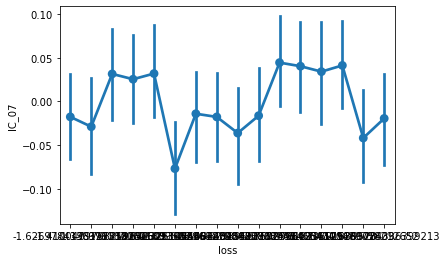

EV


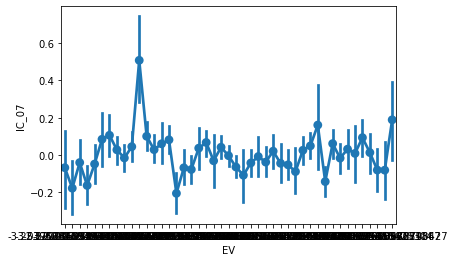

Accept


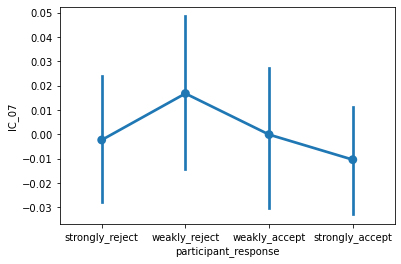

Gain


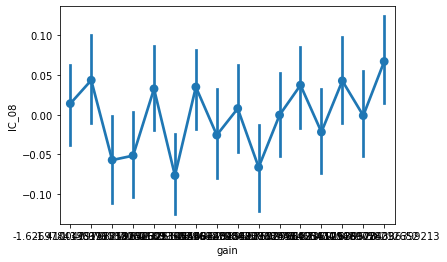

Loss


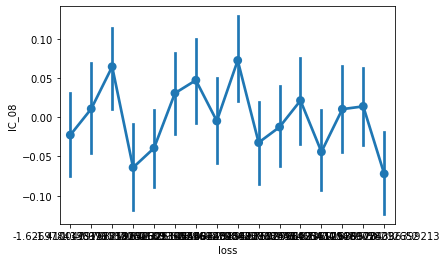

EV


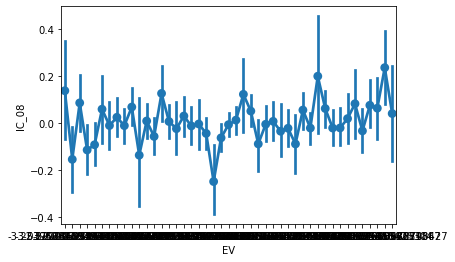

Accept


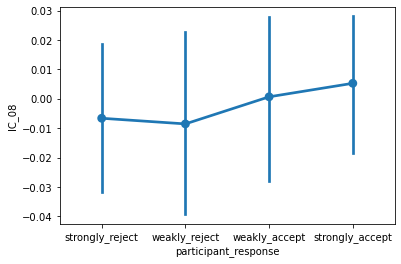

Gain


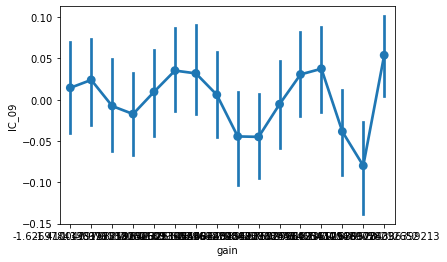

Loss


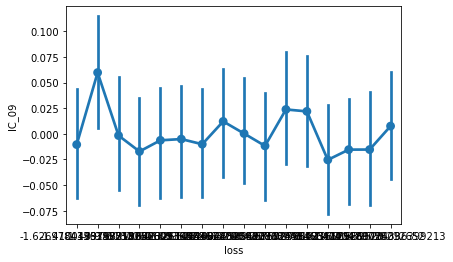

EV


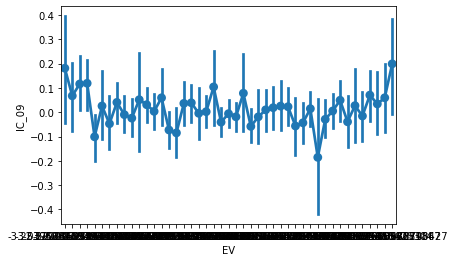

Accept


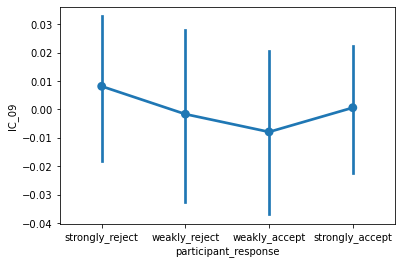

Gain


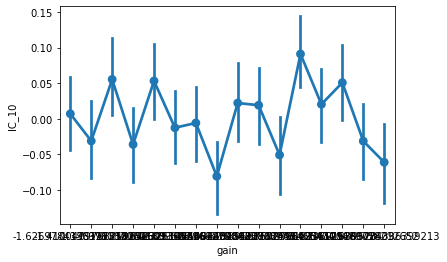

Loss


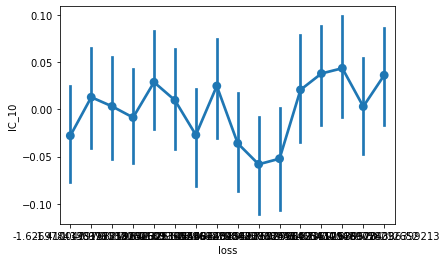

EV


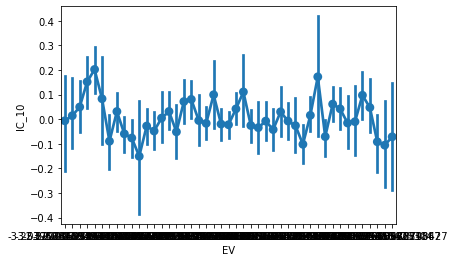

Accept


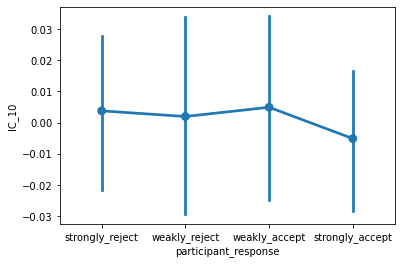

Gain


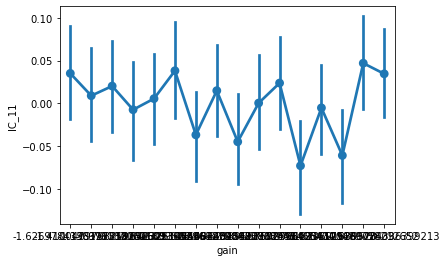

Loss


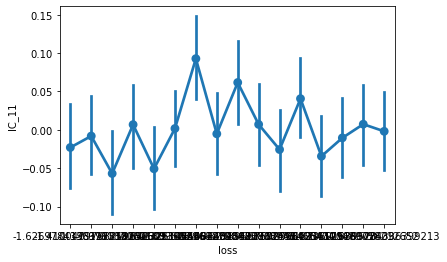

EV


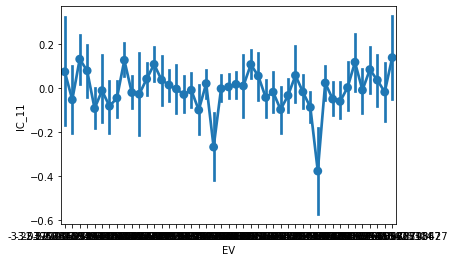

Accept


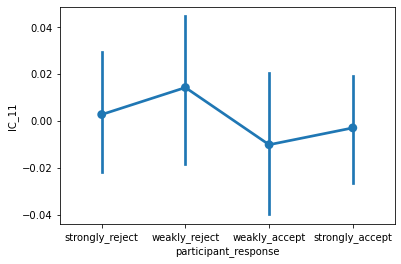

Gain


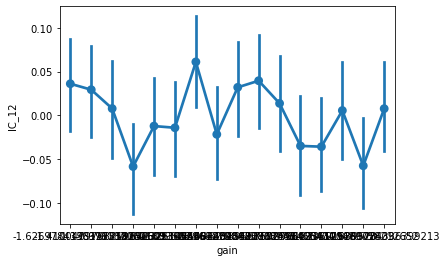

Loss


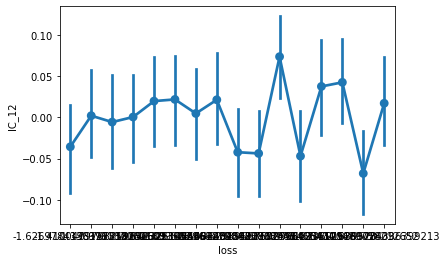

EV


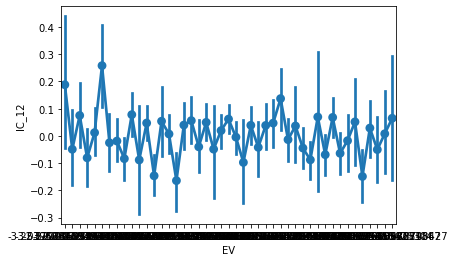

Accept


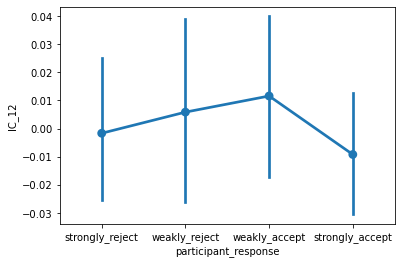

Gain


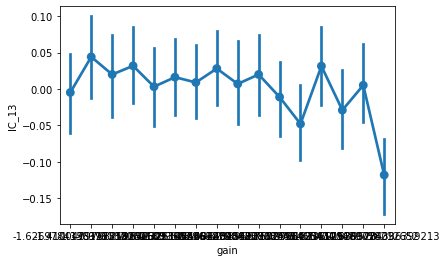

Loss


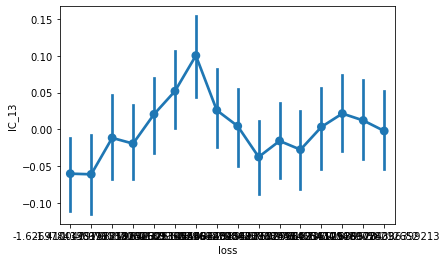

EV


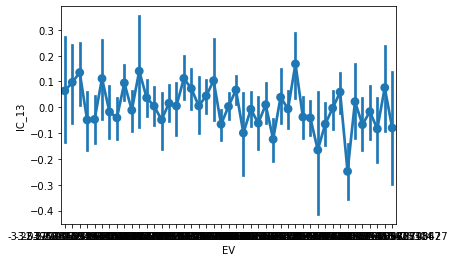

Accept


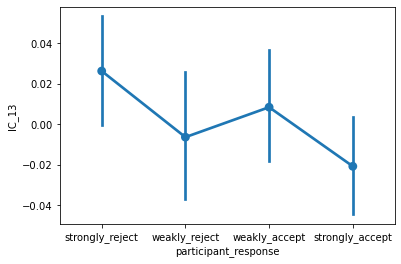

Gain


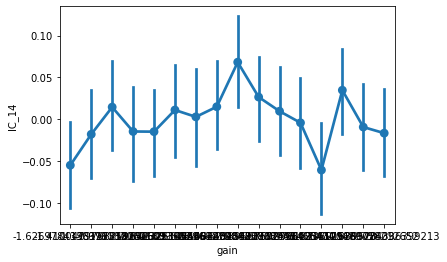

Loss


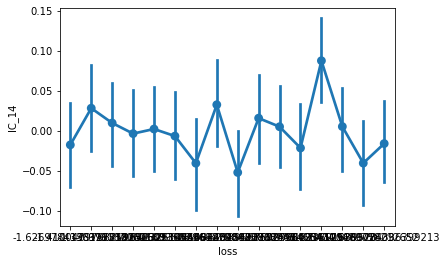

EV


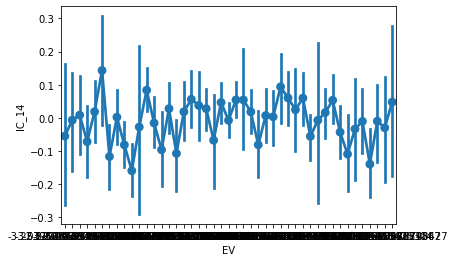

Accept


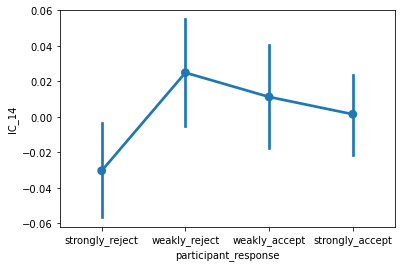

Gain


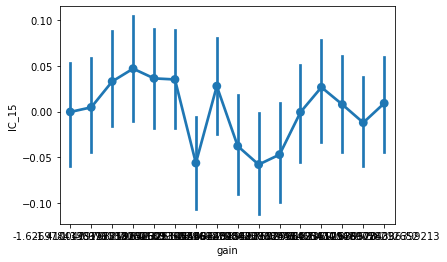

Loss


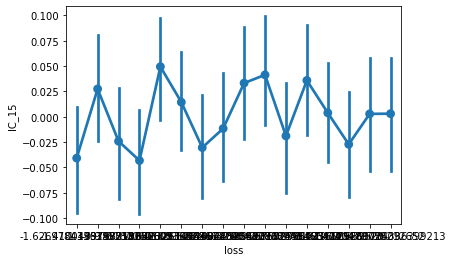

EV


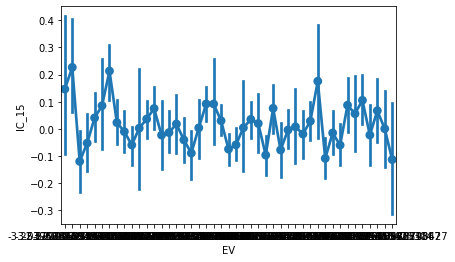

Accept


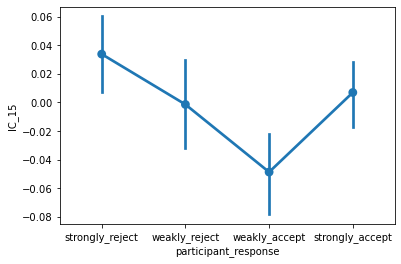

Gain


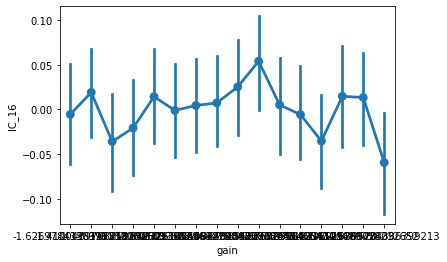

Loss


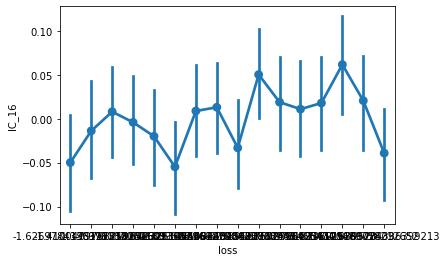

EV


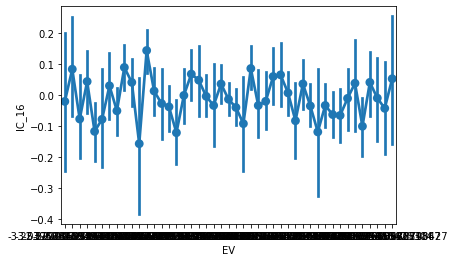

Accept


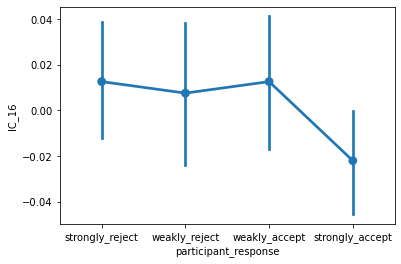

Gain


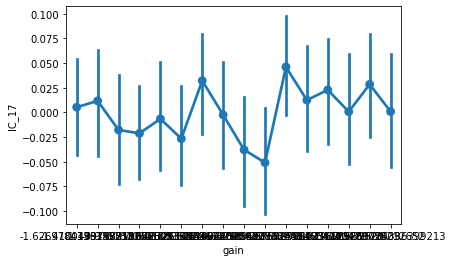

Loss


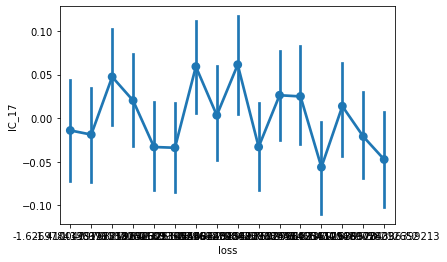

EV


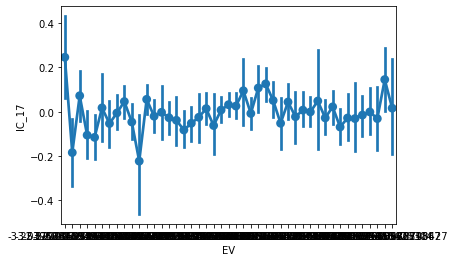

Accept


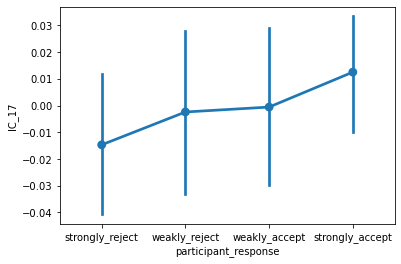

Gain


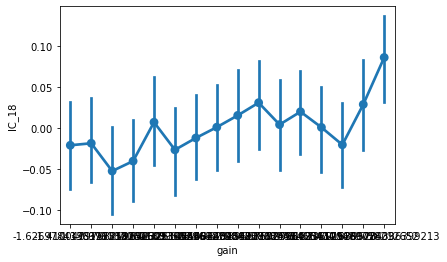

Loss


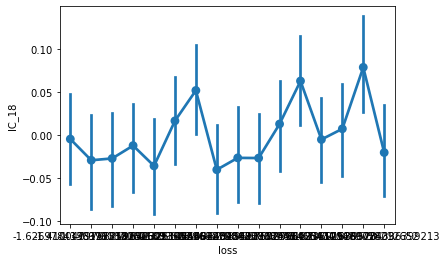

EV


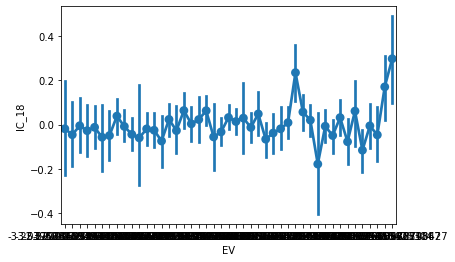

Accept


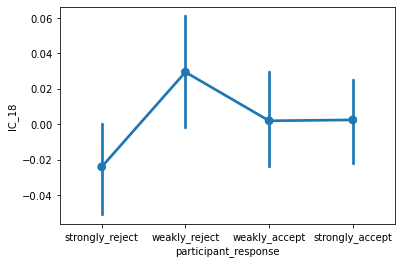

Gain


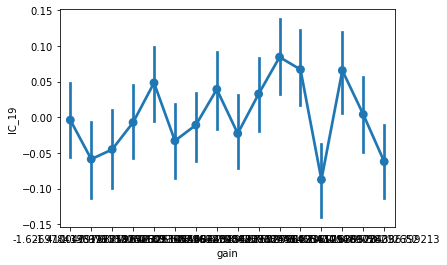

Loss


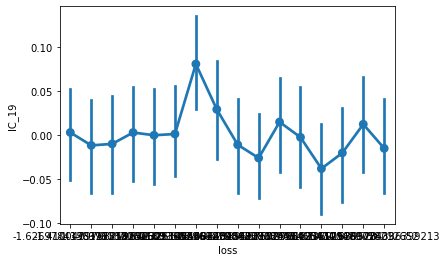

EV


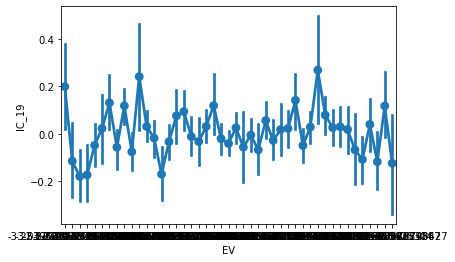

Accept


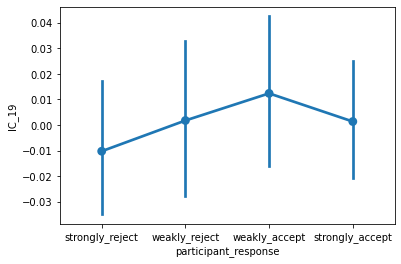

Gain


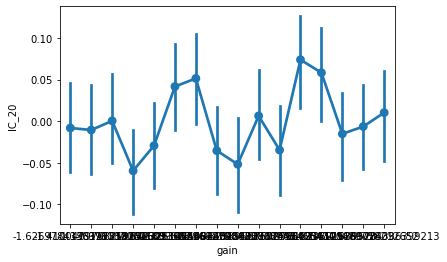

Loss


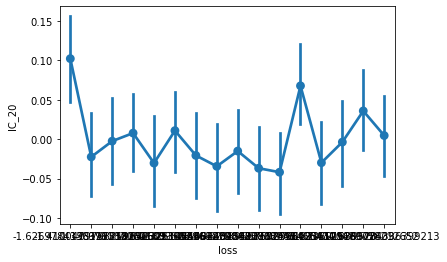

EV


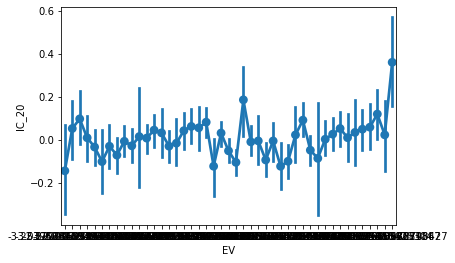

Accept


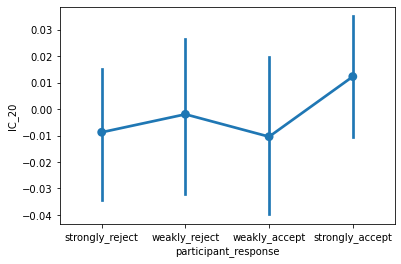

In [113]:
tmode_df['EV']=tmode_df['gain']-tmode_df['loss']
tmode_df=tmode_df[tmode_df['participant_response']!='NoResp']
import seaborn as sms
for IC in [var for var in tmode_df.columns if var.startswith('IC_')]:

    print("Gain")
    sms.pointplot(y=IC,x='gain',data=tmode_df)
    plt.show()
    print("Loss")
    sms.pointplot(y=IC,x='loss',data=tmode_df)
    plt.show()
    print("EV")
    sms.pointplot(y=IC,x='EV',data=tmode_df)
    plt.show()
    print("Accept")
    sms.pointplot(y=IC,x='participant_response',
                  order=['strongly_reject','weakly_reject','weakly_accept','strongly_accept'],
                  data=tmode_df)
    plt.show()

    
    
   

In [152]:
data=[]
import numpy as np
for IC in handclass[handclass['IsGood']==True]['IC']:       
    for sub in tmode_df['sub'].unique():
        row=[]
        
        t_df=tmode_df[(tmode_df['sub']==sub)].copy()
        
        
        mod1 = ols("%s ~ gain + loss+ EV"%(IC), data=t_df)
        res1 = mod1.fit()        
        
        row.append([sub,IC,
                    res1.params['gain'],
                    res1.params['loss'],
                    res1.params['EV']])
        row=np.array(row)
        data.append(row)
        
        
reg_df=pd.DataFrame(columns=['sub','IC','gain','loss','EV'],
                    data=np.concatenate(data))
    
reg_df[['gain','loss','EV']]=reg_df[['gain','loss','EV']].apply(
    pd.to_numeric, errors='coerce')

pivot_df=reg_df[['sub','IC','gain','loss','EV']]
pivot_df=pivot_df.pivot('sub','IC')
    
pivot_df['gain'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_contrast-Gain.csv'%(EXP,task),
                        index=False,header=False)
pivot_df['loss'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_contrast-Loss.csv'%(EXP,task),
                        index=False,header=False)
pivot_df['EV'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_EV_c.csv'%(EXP,task),
                       index=False,header=False)

display(t_df)
display(pivot_df)

sms.barplot(y="gain",x="IC",data=reg_df)
plt.show()
sms.barplot(y="loss",x='IC',data=reg_df)
plt.show()
sms.barplot(y="EV",x="IC",data=reg_df)


KeyError: 'EV'

In [126]:
data=[]
for IC in handclass[handclass['IsGood']==True]['IC']:       
    for sub in tmode_df['sub'].unique():
        row=[]
        
        t_df=tmode_df[(tmode_df['sub']==sub)].copy()
        
        
        mod1 = ols("%s ~ Linear * Quadratic "%(IC), data=t_df)
        res1 = mod1.fit()        
        
        row.append([sub,IC,
                    res1.params['Linear'],
                    res1.params['Quadratic']])
        row=np.array(row)
        data.append(row)
        
        
reg_df=pd.DataFrame(columns=['sub','IC','linear','quadratic'],
                    data=np.concatenate(data))
    
reg_df[['linear','quadratic']]=reg_df[['linear','quadratic']].apply(
    pd.to_numeric, errors='coerce')

pivot_df=reg_df[['sub','IC','linear','quadratic']]
pivot_df=pivot_df.pivot('sub','IC')
    
pivot_df['linear'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_contrast-linear.csv'%(EXP),
                        index=False,header=False)
pivot_df['quadratic'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_contrast_quadratic.csv'%(EXP),
                        index=False,header=False)
#pivot_df['INT'].to_csv('Post-Melodic/Code/PALM/%s/Fit_T_beta_INT_task-MGT.csv'%(EXP),
                        #index=False,header=False)


display(t_df)
display(pivot_df)

index    onset  duration      gain      loss     RT  \
21504      2   17.133         4 -1.626978 -1.626978  1.751   
21505     56  390.126         4 -1.626978 -1.410048  1.031   
21506     53  371.835         4 -1.626978 -1.193118  1.337   
21507     46  328.032         4 -1.626978 -0.976187  1.546   
21508     60  422.537         4 -1.626978 -0.759257  1.236   
...      ...      ...       ...       ...       ...    ...   
21755     47  330.832         4  1.626978  0.759257  2.264   
21756     39  270.422         4  1.626978  0.976187  1.440   
21757     12   80.528         4  1.626978  1.193118  2.367   
21758     14  108.131         4  1.626978  1.410048  1.750   
21759     34  234.231         4  1.626978  1.626978  1.134   

      participant_response      sub run     IC_01  ...     IC_14     IC_15  \
21504        weakly_reject  sub-124  01  0.644180  ...  0.116252  1.670490   
21505        weakly_reject  sub-124  03  0.401586  ...  0.214443  0.996143   
21506        weakly_reject  sub-124  02 -1.107191  ... -0.368851 -0.076231   
21507      strongly_reject  sub-124  01 -0.690571  ... -1.233534 -0.306266   
21508      strongly_reject  sub-124  04  0.554170  ...  0.236857 -0.594474   
...                    ...      ...  ..       ...  ...       ...       ...   
21755        weakly_accept  sub-124  03  1.200737  ...  0.585544  0.635633   
21756        weakly_accept  sub-124  03 -1.332637  ... -0.219065 -0.827931   
21757        weakly_reject  sub-124  01  1.067113  ...  0.552050 -0.091534   
21758        weakly_reject  sub-124  02  0.093679  ...  0.528399  0.121086   
21759        weakly_reject  sub-124  03 -2.248974  ... -2.113268 -0.800303   

          IC_16     IC_17     IC_18     IC_19     IC_20  Linear  Quadratic  \
21504  0.559810  0.891746 -0.972178  1.984993  1.254199    -0.5        0.5   
21505  0.272291  0.272879 -0.581013 -2.454635 -0.699910    -0.5        0.5   
21506  0.050609  0.645058  0.342030  0.311762  0.169525    -0.5        0.5   
21507  2.648434 -0.393060  0.360394  1.360214  0.940953    -1.5        1.5   
21508 -0.890492  0.754429 -1.242237  0.203805  0.488508    -1.5        1.5   
...         ...       ...       ...       ...       ...     ...        ...   
21755  0.370286  0.947805  2.058200  0.865243  2.178613     0.5        0.5   
21756  0.481088 -0.001887  0.895521  2.401896  0.561466     0.5        0.5   
21757 -0.948006  0.052592 -0.433906 -0.098203 -1.295752    -0.5        0.5   
21758  0.270857  0.937903 -0.507491  0.178009  0.449920    -0.5        0.5   
21759  0.997491 -0.164020 -2.537038  0.402399 -0.970055    -0.5        0.5   

             EV  
21504  0.000000  
21505 -0.216930  
21506 -0.433861  
21507 -0.650791  
21508 -0.867722  
...         ...  
21755  0.867722  
21756  0.650791  
21757  0.433861  
21758  0.216930  
21759  0.000000  

[256 rows x 32 columns]

linear                                                              \
IC          IC_01     IC_02     IC_03     IC_04     IC_05     IC_06     IC_07   
sub                                                                             
sub-001 -0.150017  0.231610  0.123349  0.067213 -0.113853  0.046597 -0.003419   
sub-002  0.062009 -0.019596 -0.046799 -0.014273  0.045167 -0.027521  0.022872   
sub-003  0.201771 -0.436807 -0.818965 -0.606178  0.037034  0.117205 -0.434273   
sub-006 -0.050302  0.008125 -0.023862 -0.040063 -0.097873 -0.097980 -0.038146   
sub-008 -0.073051  0.116973 -0.056636  0.166899  0.100820  0.105175  0.110007   
...           ...       ...       ...       ...       ...       ...       ...   
sub-119 -0.036398 -0.002173 -0.017358  0.103946 -0.028797 -0.118437 -0.128910   
sub-120  0.059347 -0.052627  0.126531 -0.017449 -0.109157  0.071659  0.034579   
sub-121 -0.162098  0.018113 -0.023600 -0.115234  0.093604  0.107770 -0.117542   
sub-123  0.009869 -0.032700 -0.055421 -0.016975  0.065215 -0.101407 -0.027268   
sub-124 -0.028544  0.102079  0.099521  0.014146 -0.042698  0.005436 -0.021870   

                                       ... quadratic                      \
IC          IC_08     IC_09     IC_10  ...     IC_11     IC_12     IC_13   
sub                                    ...                                 
sub-001 -0.116142 -0.135388  0.159791  ... -0.116406 -0.099113  0.099440   
sub-002  0.029886  0.045910  0.030078  ... -0.050929 -0.014613  0.065371   
sub-003 -0.143755 -0.578784  0.152665  ... -0.156672 -0.434584 -0.037872   
sub-006  0.084771 -0.043749 -0.047588  ...  0.022856 -0.047132  0.146841   
sub-008  0.096972 -0.116681 -0.058036  ...  0.310105  0.161541 -0.046125   
...           ...       ...       ...  ...       ...       ...       ...   
sub-119 -0.027601  0.093618 -0.057874  ... -0.006255  0.078777 -0.033638   
sub-120 -0.112722  0.131548 -0.072801  ... -0.292673 -0.037405 -0.220782   
sub-121 -0.063197 -0.084541  0.023490  ...  0.092371 -0.115765 -0.065934   
sub-123 -0.036246  0.011800  0.062469  ... -0.146648  0.035898 -0.352902   
sub-124  0.078122 -0.068563 -0.054611  ...  0.009782  0.107461  0.181372   

                                                                               
IC          IC_14     IC_15     IC_16     IC_17     IC_18     IC_19     IC_20  
sub                                                                            
sub-001  0.018565  0.052808 -0.159849  0.142354  0.006547  0.010885 -0.076955  
sub-002 -0.030743  0.031079 -0.049649 -0.117239 -0.148490  0.143141 -0.069490  
sub-003 -0.094930  0.014873  0.748651  0.110661 -0.000764 -0.591696 -0.497871  
sub-006  0.037466 -0.045896  0.053040  0.238447 -0.095365  0.076417  0.073248  
sub-008 -0.267729  0.100869 -0.334488 -0.104253 -0.280402 -0.077689  0.090134  
...           ...       ...       ...       ...       ...       ...       ...  
sub-119 -0.156792  0.317318 -0.176749  0.112855 -0.080737 -0.104680 -0.058457  
sub-120 -0.356943  0.082895 -0.290052  0.020224 -0.066828 -0.042197 -0.069138  
sub-121  0.033095 -0.026580 -0.123010 -0.213399  0.191450  0.019248 -0.132433  
sub-123 -0.441166 -0.281201 -0.115718  0.110863  0.400638  0.026040  0.017087  
sub-124  0.038178  0.224889  0.239637  0.022328  0.023110 -0.099118  0.050059  

[85 rows x 40 columns]

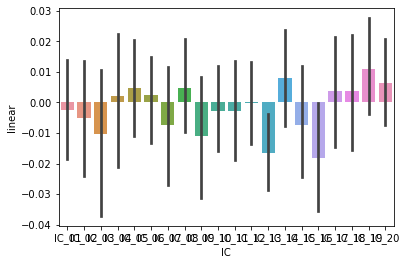

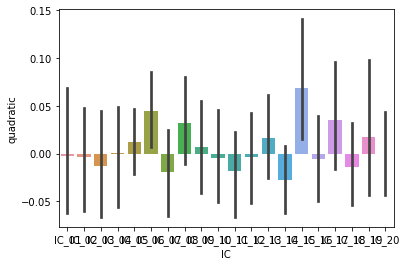

In [127]:
sms.barplot(y="linear",x="IC",data=reg_df)
plt.show()
sms.barplot(y="quadratic",x='IC',data=reg_df)
plt.show()
#sms.barplot(y="INT",x='IC',data=reg_df)
#plt.show()



In [148]:
from subprocess import Popen, PIPE

infiles=[os.path.join(root,f) for root,dirs,files in os.walk('Post-Melodic/Code/PALM/Exp3') for f in files  if 'Fit_T_beta' in f]

command_list=[]
for Input in infiles:
    contrast=re.search('beta_(.*)_task',Input).group(1)
    Output='Post-Melodic/Code/PALM/Exp3/Results/%s'%(contrast)
    command_list.append(["./palm-alpha118/palm -i %s -o %s -logp -quiet "%(Input, Output)])
    
display(command_list)

procs_list = [Popen(cmd, stdout=PIPE, stderr=PIPE,shell=True) for cmd in command_list]
for proc in procs_list:
    proc.wait()


[['./palm-alpha118/palm -i Post-Melodic/Code/PALM/Exp3/Fit_T_beta_EV_task-MGT.csv -o Post-Melodic/Code/PALM/Exp3/Results/EV -logp -quiet '],
 ['./palm-alpha118/palm -i Post-Melodic/Code/PALM/Exp3/Fit_T_beta_quadratic_task-MGT.csv -o Post-Melodic/Code/PALM/Exp3/Results/quadratic -logp -quiet '],
 ['./palm-alpha118/palm -i Post-Melodic/Code/PALM/Exp3/Fit_T_beta_linear_task-MGT.csv -o Post-Melodic/Code/PALM/Exp3/Results/linear -logp -quiet '],
 ['./palm-alpha118/palm -i Post-Melodic/Code/PALM/Exp3/Fit_T_beta_Loss_task-MGT.csv -o Post-Melodic/Code/PALM/Exp3/Results/Loss -logp -quiet '],
 ['./palm-alpha118/palm -i Post-Melodic/Code/PALM/Exp3/Fit_T_beta_INT_task-MGT.csv -o Post-Melodic/Code/PALM/Exp3/Results/INT -logp -quiet '],
 ['./palm-alpha118/palm -i Post-Melodic/Code/PALM/Exp3/Fit_T_beta_Gain_task-MGT.csv -o Post-Melodic/Code/PALM/Exp3/Results/Gain -logp -quiet ']]

In [149]:
palm_list=[]
palm_df=[]
for task in ['Gain','Loss','INT','EV','linear','quadratic']:
    #hand_class=hand_class[hand_class['Task']==task].copy()
    names=[IC for IC in handclass[handclass['IsGood']==True]['IC']]
    Output='Post-Melodic/Code/PALM/Exp3/Results/'
    print(task)
    print([Output+f for f in os.listdir(Output) if (f.startswith(task))&('tstat' in f)])
    for f in [Output+f for f in os.listdir(Output) if (f.startswith(task))&('tstat' in f)]:
        t=pd.read_csv(f,names=names,)
        t['file']=re.search('tstat(.*)',f).group(0)
        t['Task']=task
        palm_df.append(t)
        
palm_df=pd.concat(palm_df)
palm_list.append(palm_df.melt(id_vars=['file','Task'],var_name='IC',value_name='stat'))
palm_df=pd.concat(palm_list)


Gain
['Post-Melodic/Code/PALM/Exp3/Results/Gain_dat_tstat_c1.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Gain_dat_tstat_uncp_c1.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Gain_dat_tstat_fwep_c1.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Gain_dat_tstat_c2.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Gain_dat_tstat_fwep_c2.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Gain_dat_tstat_uncp_c2.csv']
Loss
['Post-Melodic/Code/PALM/Exp3/Results/Loss_dat_tstat_c1.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Loss_dat_tstat_c2.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Loss_dat_tstat_uncp_c1.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Loss_dat_tstat_fwep_c2.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Loss_dat_tstat_uncp_c2.csv', 'Post-Melodic/Code/PALM/Exp3/Results/Loss_dat_tstat_fwep_c1.csv']
INT
['Post-Melodic/Code/PALM/Exp3/Results/INT_dat_tstat_uncp_c2.csv', 'Post-Melodic/Code/PALM/Exp3/Results/INT_dat_tstat_uncp_c1.csv', 'Post-Melodic/Code/PALM/Exp3/Results/INT_dat_tstat_c1.csv', 'Post-Melodic/Code/PA

In [150]:
display(palm_df[(palm_df['file'].str.contains('fwep'))&(palm_df['stat']<0.1)])
display(palm_df[(palm_df['file'].str.contains('uncp'))&(palm_df['stat']<0.05)])

display(palm_df[(palm_df['file'].str.contains('fwep'))&(palm_df['stat']>1.3)])
display(palm_df[(palm_df['file'].str.contains('uncp'))&(palm_df['stat']>1.3)])

file       Task     IC    stat
2    tstat_fwep_c1.csv       Gain  IC_01 -0.0000
4    tstat_fwep_c2.csv       Gain  IC_01  0.0027
9    tstat_fwep_c2.csv       Loss  IC_01 -0.0000
11   tstat_fwep_c1.csv       Loss  IC_01  0.0003
15   tstat_fwep_c1.csv        INT  IC_01 -0.0000
..                 ...        ...    ...     ...
704  tstat_fwep_c1.csv         EV  IC_20  0.0827
708  tstat_fwep_c2.csv     linear  IC_20 -0.0000
709  tstat_fwep_c1.csv     linear  IC_20  0.0034
718  tstat_fwep_c1.csv  quadratic  IC_20 -0.0000
719  tstat_fwep_c2.csv  quadratic  IC_20 -0.0000

[221 rows x 4 columns]

file       Task     IC    stat
21   tstat_uncp_c1.csv         EV  IC_01  0.0183
82   tstat_uncp_c2.csv       Loss  IC_03  0.0357
131  tstat_uncp_c2.csv         EV  IC_04  0.0163
145  tstat_uncp_c1.csv       Gain  IC_05  0.0076
152  tstat_uncp_c1.csv       Loss  IC_05  0.0055
185  tstat_uncp_c2.csv       Gain  IC_06  0.0214
190  tstat_uncp_c2.csv       Loss  IC_06  0.0197
211  tstat_uncp_c2.csv  quadratic  IC_06  0.0065
275  tstat_uncp_c2.csv         EV  IC_08  0.0190
283  tstat_uncp_c2.csv  quadratic  IC_08  0.0455
372  tstat_uncp_c2.csv        INT  IC_11  0.0338
433  tstat_uncp_c1.csv       Gain  IC_13  0.0112
453  tstat_uncp_c1.csv         EV  IC_13  0.0004
459  tstat_uncp_c1.csv     linear  IC_13  0.0027
498  tstat_uncp_c1.csv  quadratic  IC_14  0.0295
516  tstat_uncp_c2.csv        INT  IC_15  0.0085
535  tstat_uncp_c2.csv  quadratic  IC_15  0.0027
550  tstat_uncp_c2.csv       Loss  IC_16  0.0136
561  tstat_uncp_c1.csv         EV  IC_16  0.0206
567  tstat_uncp_c1.csv     linear  IC_16  0.0106
617  tstat_uncp_c2.csv       Gain  IC_18  0.0002
622  tstat_uncp_c2.csv       Loss  IC_18  0.0003
671  tstat_uncp_c2.csv         EV  IC_19  0.0451
676  tstat_uncp_c2.csv     linear  IC_19  0.0371
707  tstat_uncp_c2.csv         EV  IC_20  0.0397

file  Task     IC    stat
450  tstat_fwep_c2.csv    EV  IC_13  1.8633
614  tstat_fwep_c1.csv  Gain  IC_18  2.0809
623  tstat_fwep_c1.csv  Loss  IC_18  1.6615

file       Task     IC    stat
23   tstat_uncp_c2.csv         EV  IC_01  1.4157
129  tstat_uncp_c1.csv         EV  IC_04  1.4535
149  tstat_uncp_c2.csv       Gain  IC_05  1.8125
154  tstat_uncp_c2.csv       Loss  IC_05  1.9586
188  tstat_uncp_c1.csv       Loss  IC_06  1.3307
210  tstat_uncp_c1.csv  quadratic  IC_06  1.8477
273  tstat_uncp_c1.csv         EV  IC_08  1.3883
437  tstat_uncp_c2.csv       Gain  IC_13  1.6055
455  tstat_uncp_c2.csv         EV  IC_13  2.9586
460  tstat_uncp_c2.csv     linear  IC_13  2.1079
517  tstat_uncp_c1.csv        INT  IC_15  1.8125
534  tstat_uncp_c1.csv  quadratic  IC_15  2.1675
548  tstat_uncp_c1.csv       Loss  IC_16  1.4584
563  tstat_uncp_c2.csv         EV  IC_16  1.3307
568  tstat_uncp_c2.csv     linear  IC_16  1.6073
613  tstat_uncp_c1.csv       Gain  IC_18  3.0969
620  tstat_uncp_c1.csv       Loss  IC_18  2.9208

In [143]:
for IC in reg_df['IC'].unique():
    print(IC)
    icn=re.search('IC_(.*)',IC).group(1)
    plt_df=reg_df[(reg_df['IC']==IC)].copy()
    plt_df=plt_df.melt(id_vars=['sub','IC'])
    
    G_Lstats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Gain-Loss')].sort_values(by='file')
   
    L_Nstats=palm_df[(palm_df['IC']==IC)&
                     (palm_df['Task']=='Loss-Neutral')].sort_values(by='file')
   
    
    #md = smf.mixedlm("value ~ Linear+Quadratic", t_DF, groups=t_DF['sub']).fit()
    #display(md.summary())
    #r,p=stats.spearmanr(p_df['s_%s'%(icn)],p_df['fd_mean'])
    #title4='Correlation With Motion r:%04f p:%04f' %(r,p)
    
    display(multi_table([Lin_stats,Quad_stats,G_Lstats,G_Nstats,L_Nstats]))
    
    img=handclass[handclass['IC']==IC]['path_to_stat'].values[0]
    nilearn.plotting.plot_stat_map(img,cut_coords=[0,12,0],draw_cross=False)
    plt.show()

    fig,((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12,12))
    ax1.set_title("Swarm Temporal Fit")
    ax2.set_title("Point Temporal Fit")
    ax4.set_title(title4)

    sms.swarmplot(x='variable',y='value',data=plt_df,ax=ax1,
                  order=['Losses','Neutral','Gain'])
    sms.pointplot(x='variable',y='value',hue='sub',data=plt_df,ax=ax2
                  ,
                 order=['Losses','Neutral','Gain'])
    #ax2.get_legend().remove()
    #sms.barplot(x='groups',y='%s'%(IC),data=plt_df,ax=ax3)
    sms.regplot(x='fd_mean',y='s_%s'%(icn),data=p_df,ax=ax4)
    
    plt.show()

IC_01


NameError: name 'Lin_stats' is not defined

In [ ]:
palm_df[(palm_df['file'].str.contains('unc'))&(palm_df['stat']<0.05)].sort_values(by='Task')

In [ ]:
for IC in tmode_df.columns[tmode_df.columns.str.startswith("IC")]:
    print(IC)
    plt_df=tmode_df[tmode_df['participant_response']!='NoResp']
    sms.pointplot(x='participant_response',y=IC,data=plt_df,order=
                  ['strongly_reject','weakly_reject',
                  'weakly_accept','strongly_accept'])
    r
    plt.show()


In [ ]:
tmode_df


In [ ]:
for sub in tmode_df['sub'].unique():
    print(sub)
    plt_df=tmode_df[tmode_df['sub']==sub]
    sms.pairplot(data=plt_df,vars=['IC_01','IC_02','IC_03','IC_04'],hue='run',
                hue_order=['01','02','03','04'])
    plt.show()

In [ ]:
for IC in reg_df.IC.unique():
    print(IC)
    sms.lmplot(x='gain',y='loss',data=reg_df[reg_df['IC']==IC])
    plt.show()